# Comprehensive data science practice with python - House Prices: Advanced Regression Techniques

This notebook is based on the famous Kaggle dataset that looks at predicting house prices from the data given.

Below are a list of notebooks that I have been used for inspiration:

https://www.kaggle.com/amiiiney/price-prediction-regularization-stacking - Started with this one

https://www.kaggle.com/servietsky/house-price-easy-modeling-easy-blending-ipynb - For exploratory data analysis

https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset - For regression analysis

## TIPS:

* I wouldn't say that knowing your data is the most difficult thing in data science, but it is time-consuming. Therefore, it's easy to overlook this initial step and jump too soon into the water.

What we're going to do in this notebook is:

* Understand the problem. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.
* Univariable study. We'll just focus on the dependent variable ('SalePrice') and try to know a little bit more about it.
* Multivariate study. We'll try to understand how the dependent variable and independent variables relate.
* Basic cleaning. We'll clean the dataset and handle the missing data, outliers and categorical variables.
* Test assumptions. We'll check if our data meets the assumptions required by most multivariate techniques.

Now, it's time to have fun!

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exploratory data analysis EDA

In [2]:
traindata = pd.read_csv('train.csv')
testdata = pd.read_csv('test.csv')

pd.set_option('display.max_columns', None)
testdata.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [3]:
# Find shapes of the array in the train and test data

print(testdata.shape)
print(traindata.shape)

(1459, 80)
(1460, 81)


In [4]:
# Find info on the dataset

traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In order to understand our data, we can look at each variable and try to understand their meaning and relevance to this problem. I know this is time-consuming, but it will give us the flavour of our dataset.

The analysis below aims to answer these questions

* Do we think about this variable when we are buying a house? (e.g. When we think about the house of our dreams, do we care about its 'Masonry veneer type'?).
* If so, how important would this variable be? (e.g. What is the impact of having 'Excellent' material on the exterior instead of 'Poor'? And of having 'Excellent' instead of 'Good'?).
* Is this information already described in any other variable? (e.g. If 'LandContour' gives the flatness of the property, do we really need to know the 'LandSlope'?).

# Find correlations in the dataset with target label (SalePrice)

## Univariate analysis on target SalePrice value

In [5]:
# Check that the minimum is > 0 (for NA values)
traindata['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

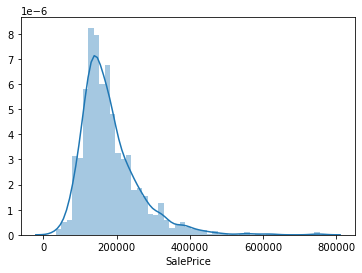

In [6]:
# A histogram plot is an effective way to show both skewness and kurtosis of a data as you can easily spot if something is wrong with the data

sns.distplot(traindata['SalePrice'])

Looks like the target sale price is:
* Deviates the normal distribution.
* Have appreciable positive skewness.
* Show peakedness. (only 1 peak)

We want our skewness value to be around 0 and kurtosis less than 3. For more information about skewness and kurtosis, the article below can help:

https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa

skewness = degree of distortion, symmetrical data

kurtosis = measures the degree of outliers present in the distribution

Here are two examples of skewed features: Ground living area and 1st floor SF. We will apply np.log1p to the skewed variables.

In [7]:
#skewness and kurtosis
print("Skewness: %f" % traindata['SalePrice'].skew())
print("Kurtosis: %f" % traindata['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


## Multivariate study on SalePrice

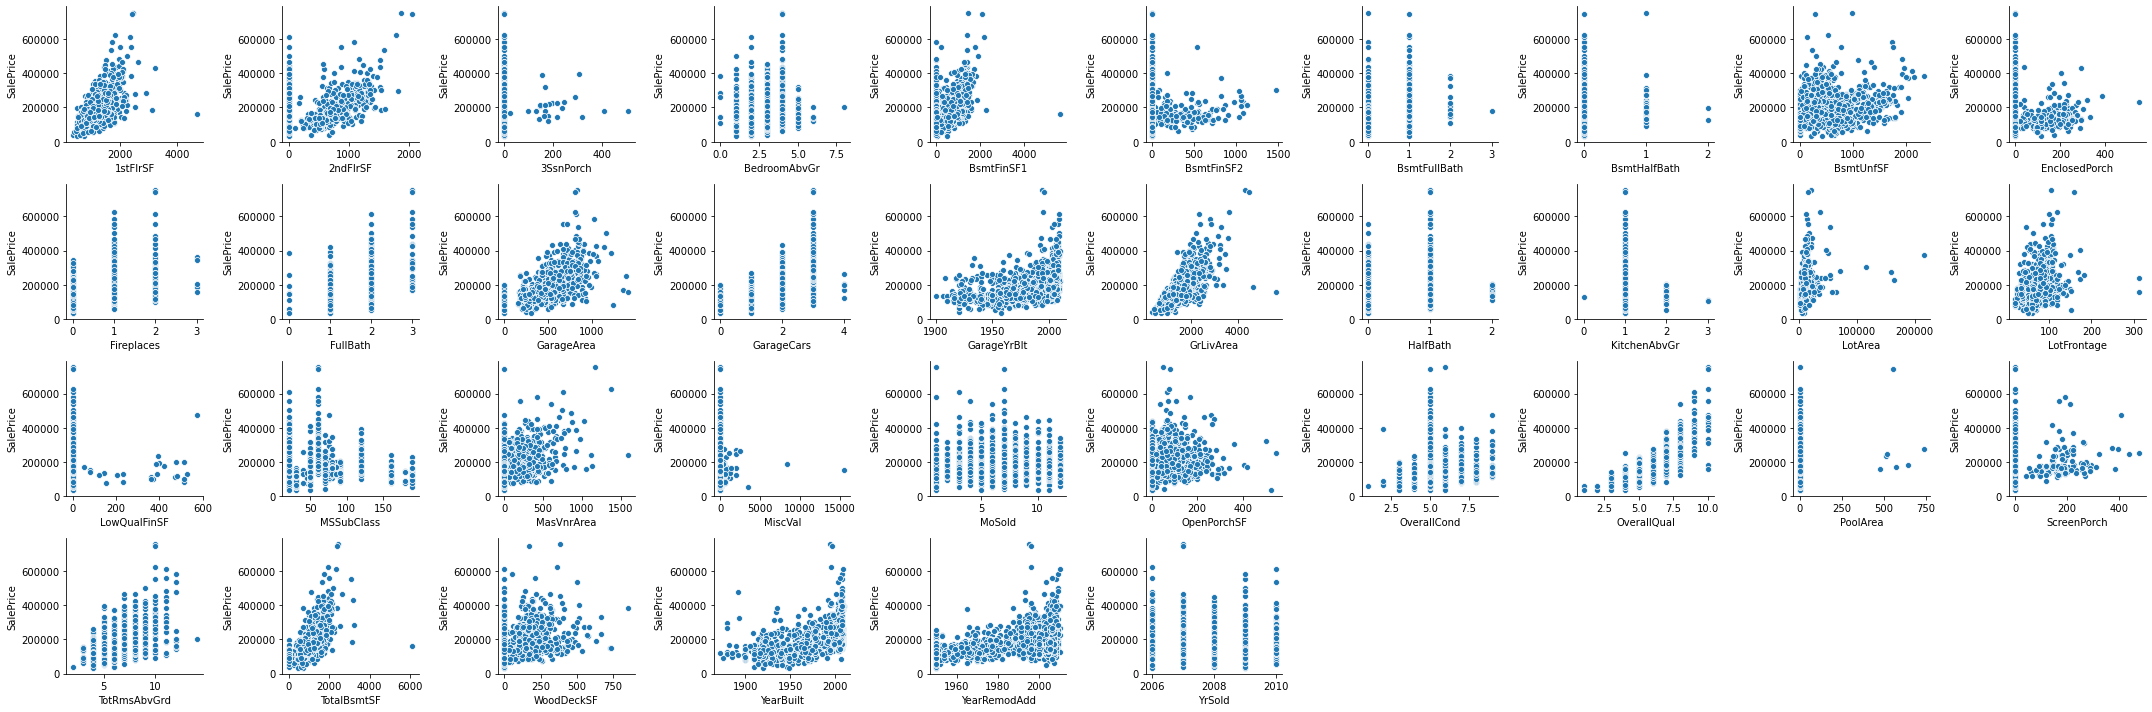

In [8]:
index_str = sorted(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
        'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
        'LotFrontage', 'MasVnrArea', 'GarageYrBlt'])

plt.figure(figsize=[30,10])
i = 1
for col in index_str :
    plt.subplot(4,10,i)
    sns.scatterplot(x=col, y = 'SalePrice' ,data= traindata)
    sns.despine()
    i = i+1
plt.tight_layout()
plt.show()

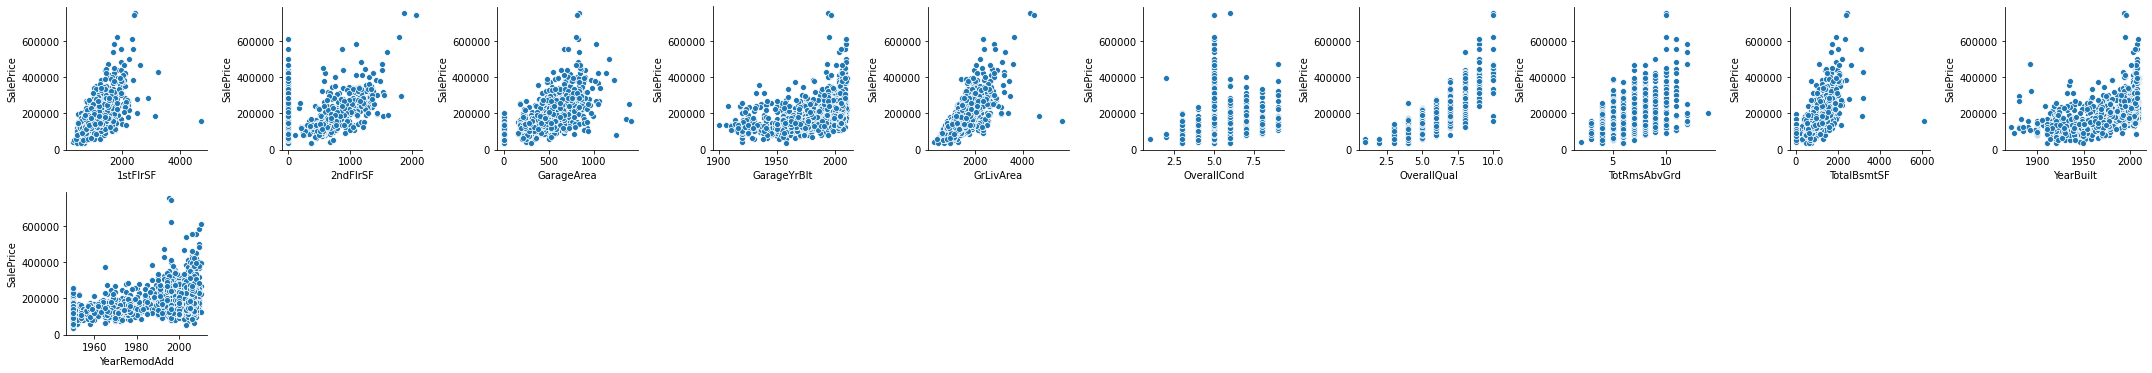

In [9]:
# Filtering the ones that only have some form of correlation

index_str = sorted(['OverallQual', 'OverallCond','YearBuilt', 
                    'YearRemodAdd','TotalBsmtSF', '1stFlrSF', 
                    '2ndFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 
                    'GarageArea', 'GarageYrBlt'])

plt.figure(figsize=[30,10])
i = 1
for col in index_str :
    plt.subplot(4,10,i)
    sns.scatterplot(x=col, y = 'SalePrice' ,data= traindata)
    sns.despine()
    i = i+1
plt.tight_layout()
plt.show()

* It seems that the overall quality, the living area, basement area, garage cars and garage area have the highest correlation values with the sale price, which is logical, better quality and bigger area = Higher price.
* These variables can be segmented into two 'building' variables ('OverallQual' and 'YearBuilt') and two 'space' variables ('TotalBsmtSF' and 'GrLivArea')
* Also some features such as, full bath or 1st floor surface have a higher correlation, those are luxury features, more luxury = Higher price.
* and Year built, the newer buildings seem to have higher sale prices.
* Example of a strong correlation between 2 numerical features: Sale price and ground living area

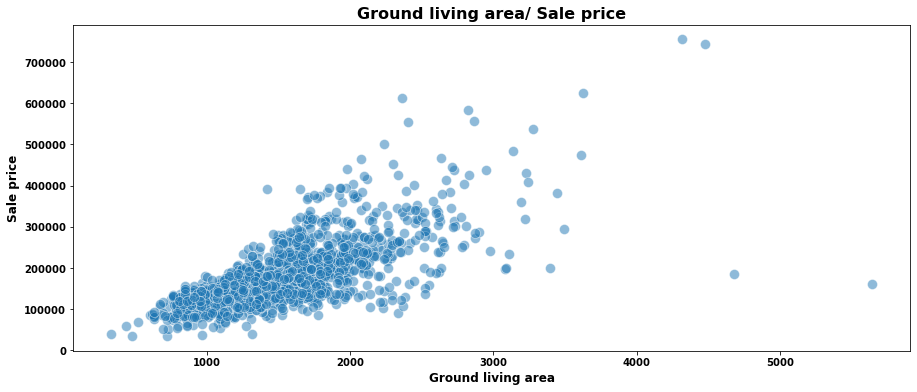

In [10]:
# Scatter plot of one of the best correlated values with sale price

plt.figure(figsize=(15,6))
sns.scatterplot(data=traindata, x='GrLivArea', y='SalePrice', alpha=0.5, s=100)
plt.title('Ground living area/ Sale price', weight='bold', fontsize=16)
plt.xlabel('Ground living area', weight='bold', fontsize=12)
plt.ylabel('Sale price', weight='bold', fontsize=12)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

## Correlations with categorical features

In [11]:
obj = traindata.select_dtypes(include='object')
sorted(obj.columns)

['Alley',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Foundation',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'MiscFeature',
 'Neighborhood',
 'PavedDrive',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities']

### Neighborhood data effect on sale price

* Real estate mantra that all that matters is 'location, location and location'?

In [12]:
# Looks like the neighborhood object value is of interest
# Compute the mean of the neighborhoods to prices

grpmean = traindata.groupby(['Neighborhood'])['SalePrice'].mean().reset_index()
grpmean = grpmean.sort_values(by=['SalePrice'], ascending=False)
grpmean

Neighborhood      SalePrice
15      NoRidge  335295.317073
16      NridgHt  316270.623377
22      StoneBr  310499.000000
23       Timber  242247.447368
24      Veenker  238772.727273
21      Somerst  225379.837209
4       ClearCr  212565.428571
6       Crawfor  210624.725490
5       CollgCr  197965.773333
0       Blmngtn  194870.882353
8       Gilbert  192854.506329
14       NWAmes  189050.068493
20      SawyerW  186555.796610
11      Mitchel  156270.122449
12        NAmes  145847.080000
13      NPkVill  142694.444444
18        SWISU  142591.360000
1       Blueste  137500.000000
19       Sawyer  136793.135135
17      OldTown  128225.300885
7       Edwards  128219.700000
3       BrkSide  124834.051724
2        BrDale  104493.750000
9        IDOTRR  100123.783784
10      MeadowV   98576.470588

Text(0, 0.5, 'Price')

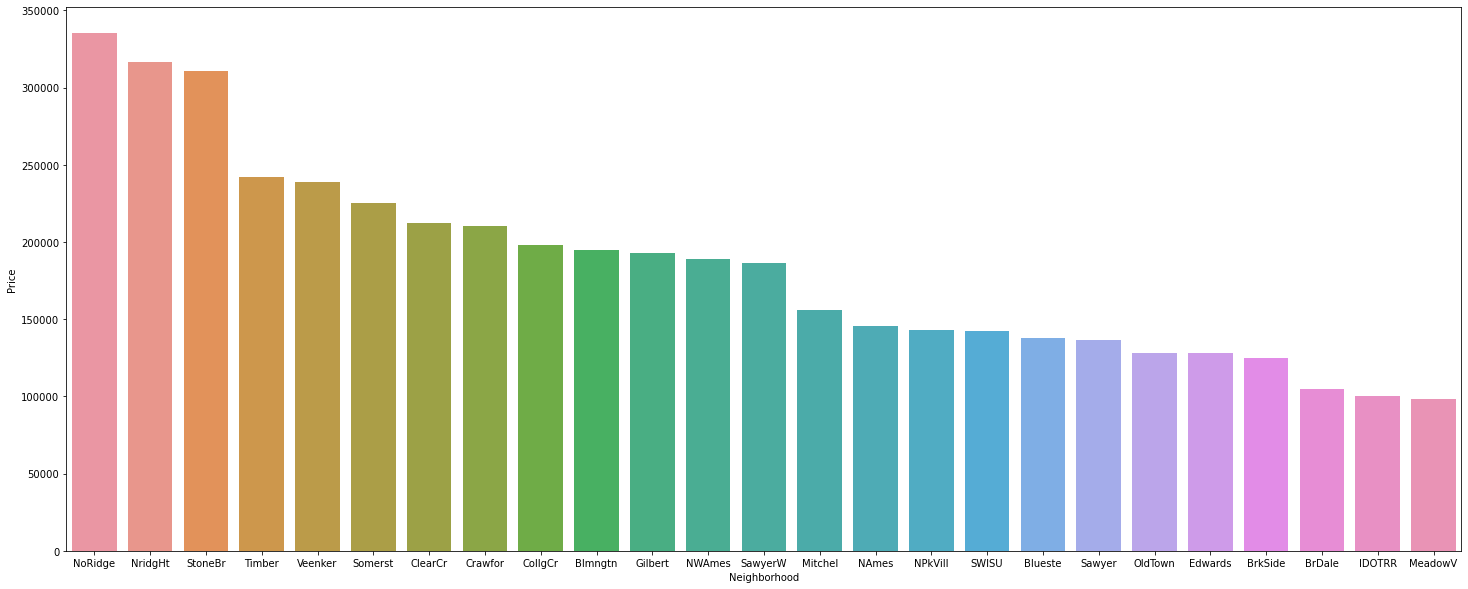

In [13]:
plt.figure(figsize = (25,10))
sns.barplot(data=grpmean, y=grpmean['SalePrice'], x=grpmean['Neighborhood'])
plt.ylabel('Price')

## Sorted neighbourhood with price graphs

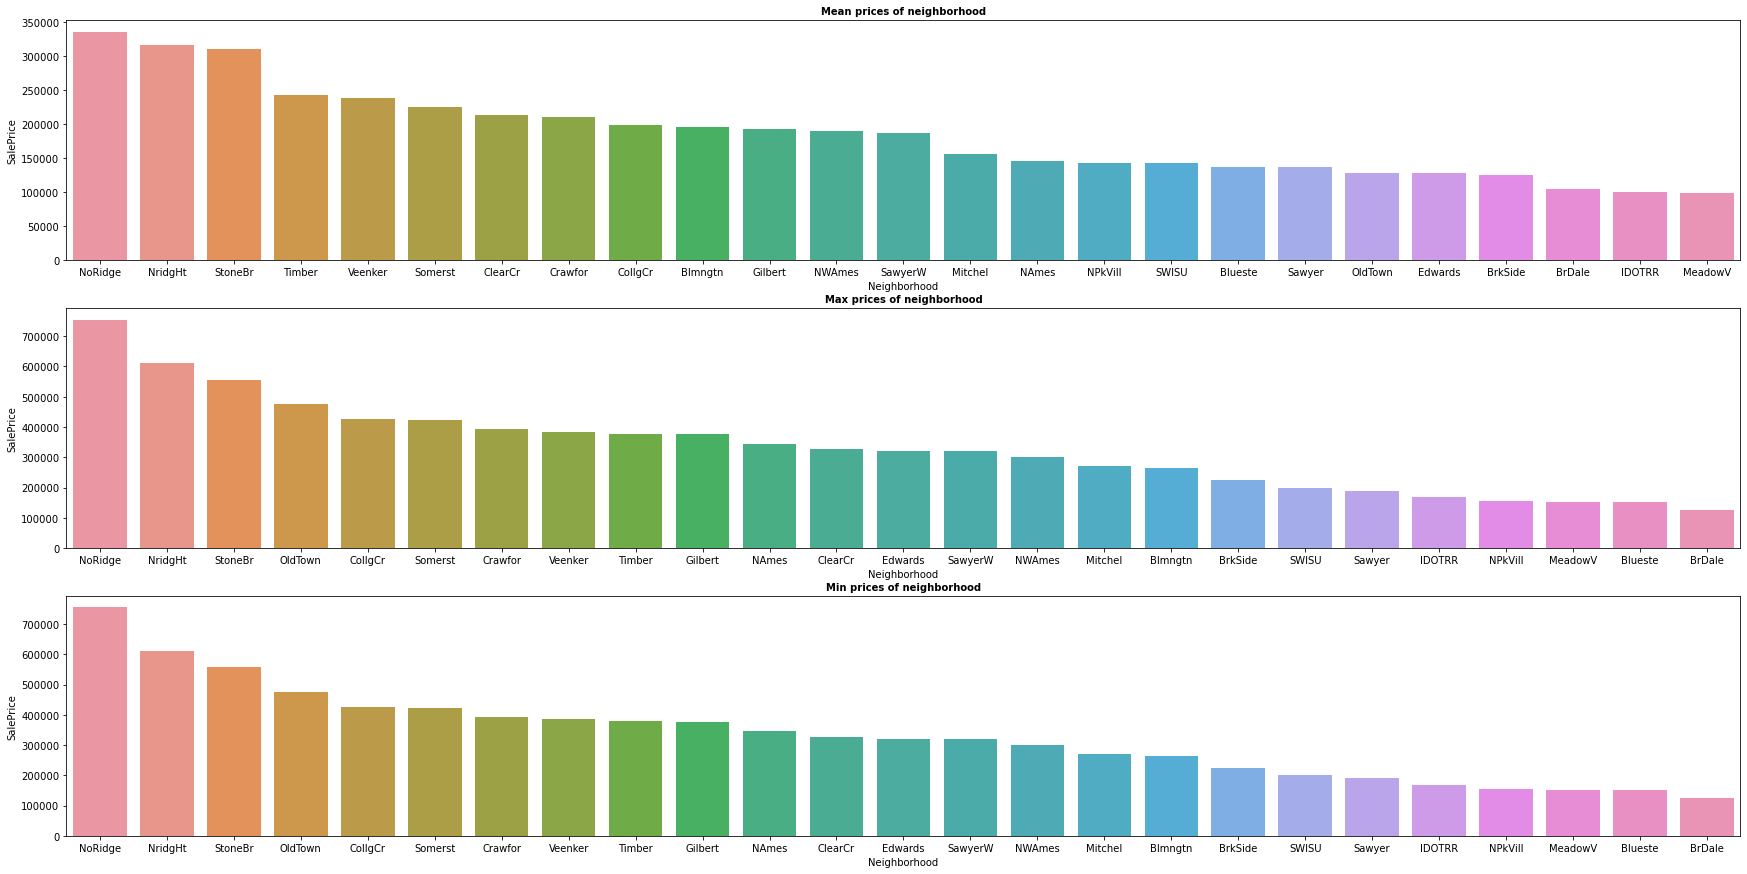

In [14]:
# Get other factors for max and mininmum

grpmax = traindata.groupby(['Neighborhood'])['SalePrice'].max().reset_index()
grpmax = grpmax.sort_values(by=['SalePrice'], ascending=False)

grpmin = traindata.groupby(['Neighborhood'])['SalePrice'].max().reset_index()
grpmin = grpmin.sort_values(by=['SalePrice'], ascending=False)


fig = plt.figure(figsize=(30,15))

cols = 1
rows = 3


ax1 = plt.subplot2grid((rows ,cols),(0,0))
sns.barplot(data=grpmean, y=grpmean['SalePrice'], x=grpmean['Neighborhood'])
plt.title('Mean prices of neighborhood', fontsize=10, weight='bold' )

ax1 = plt.subplot2grid((rows,cols),(1,0))
sns.barplot(data=grpmax, y=grpmax['SalePrice'], x=grpmax['Neighborhood'])
plt.title('Max prices of neighborhood', fontsize=10, weight='bold' )

ax1 = plt.subplot2grid((rows,cols),(2,0))
sns.barplot(data=grpmin, y=grpmin['SalePrice'], x=grpmin['Neighborhood'])
plt.title('Min prices of neighborhood', fontsize=10, weight='bold')

plt.show()

# Actually boxplots are the best way to represent this!

## With Seaborn

<img src = https://www.simplypsychology.org/boxplot.jpg>

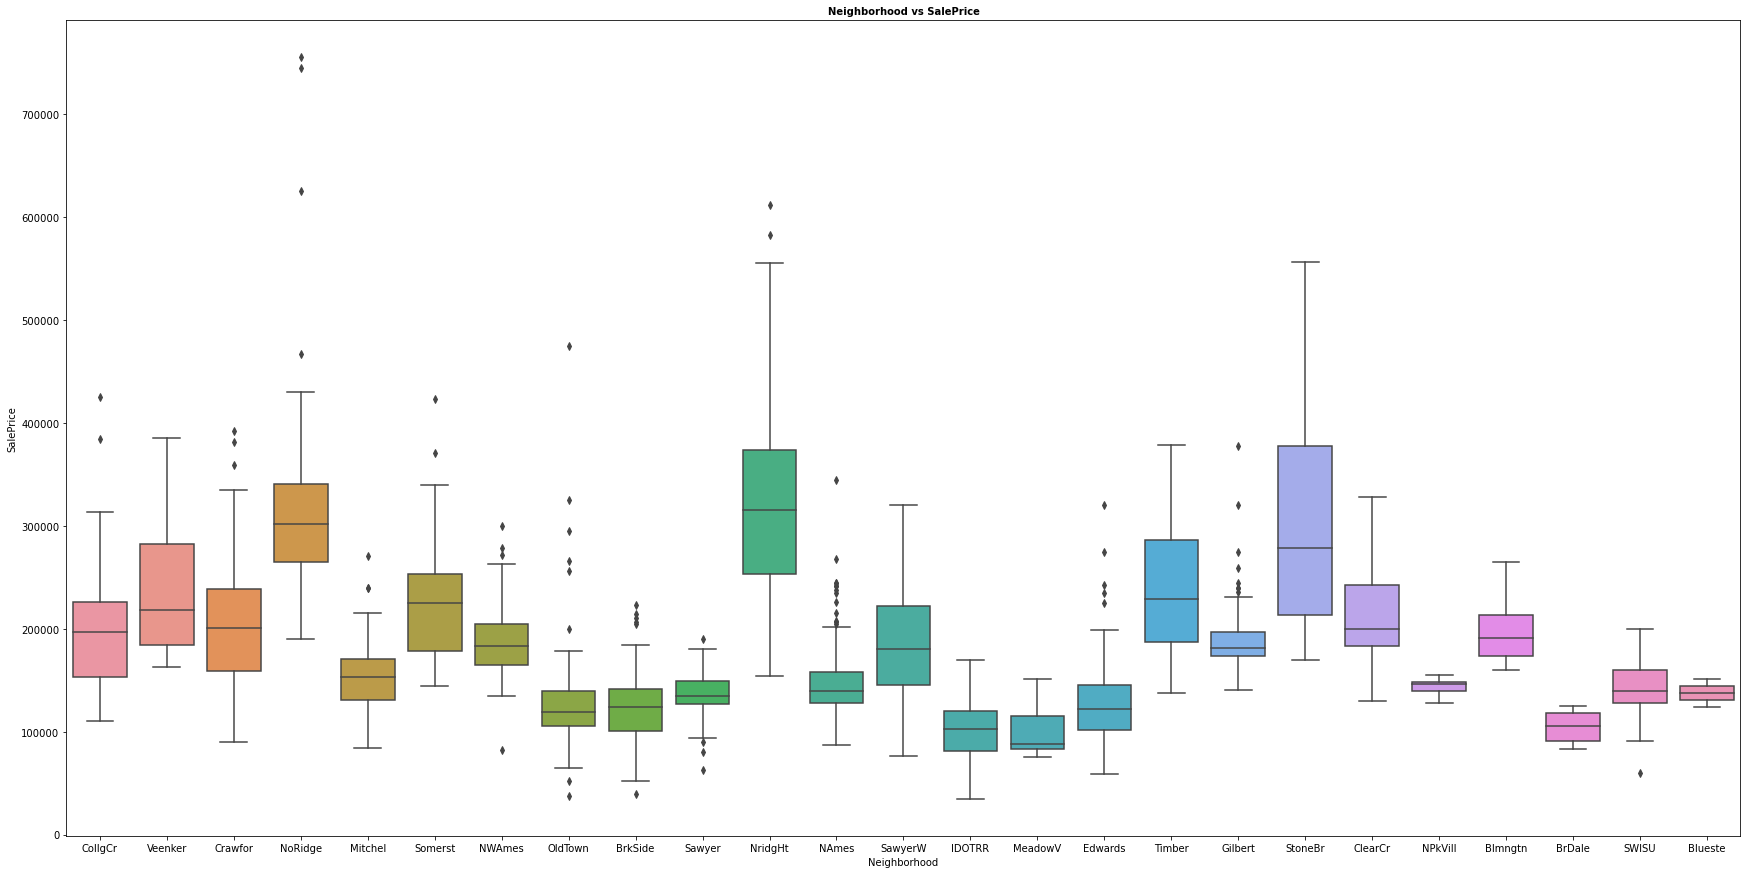

In [16]:
# Get other factors for max and mininmum

fig = plt.figure(figsize=(30,15))


sns.boxplot(data=traindata, y='SalePrice', x='Neighborhood')
plt.title('Neighborhood vs SalePrice', fontsize=10, weight='bold' )
plt.show()

## With Plotly Express

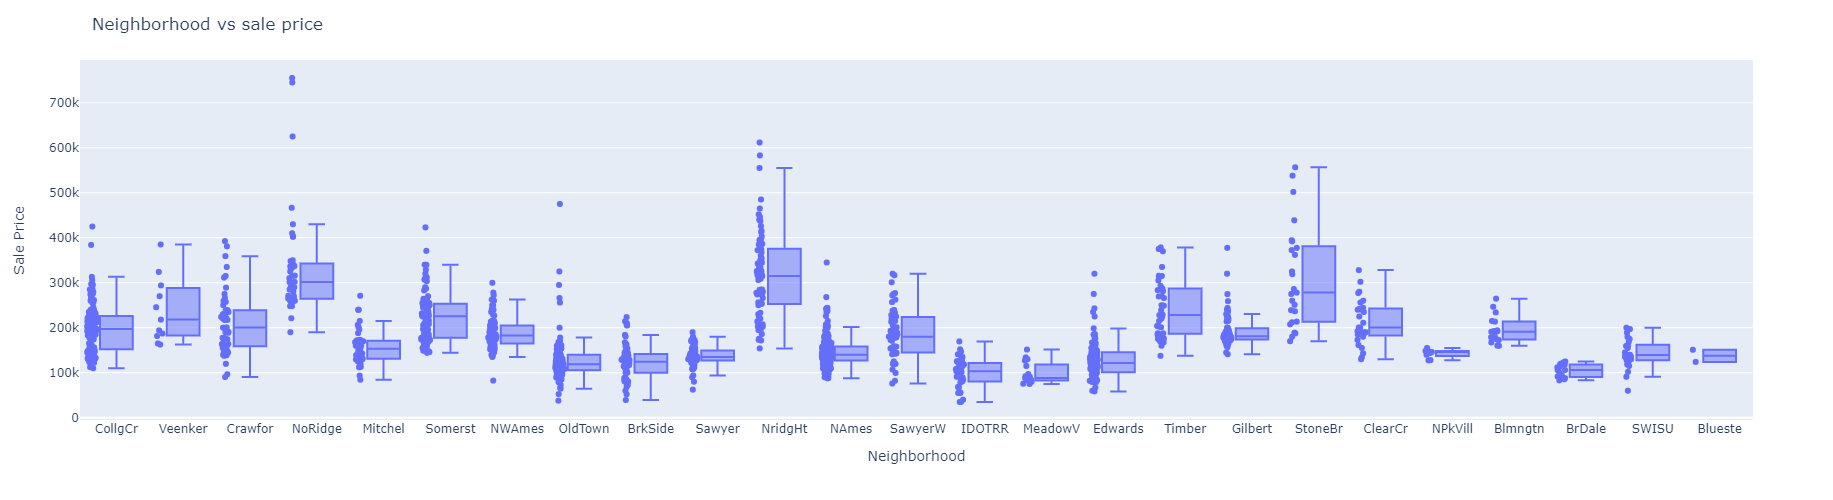

In [17]:
fig = px.box(data_frame=traindata, y='SalePrice', x='Neighborhood', points="all", notched=False, width = 2000, height = 500) # color = 'Neighborhood' doesn't work as it shrinks the box plot for some reason...
fig.update_layout(
    title="Neighborhood vs sale price",
    xaxis_title="Neighborhood",
    yaxis_title="Sale Price",)

# Relationship with overall quality

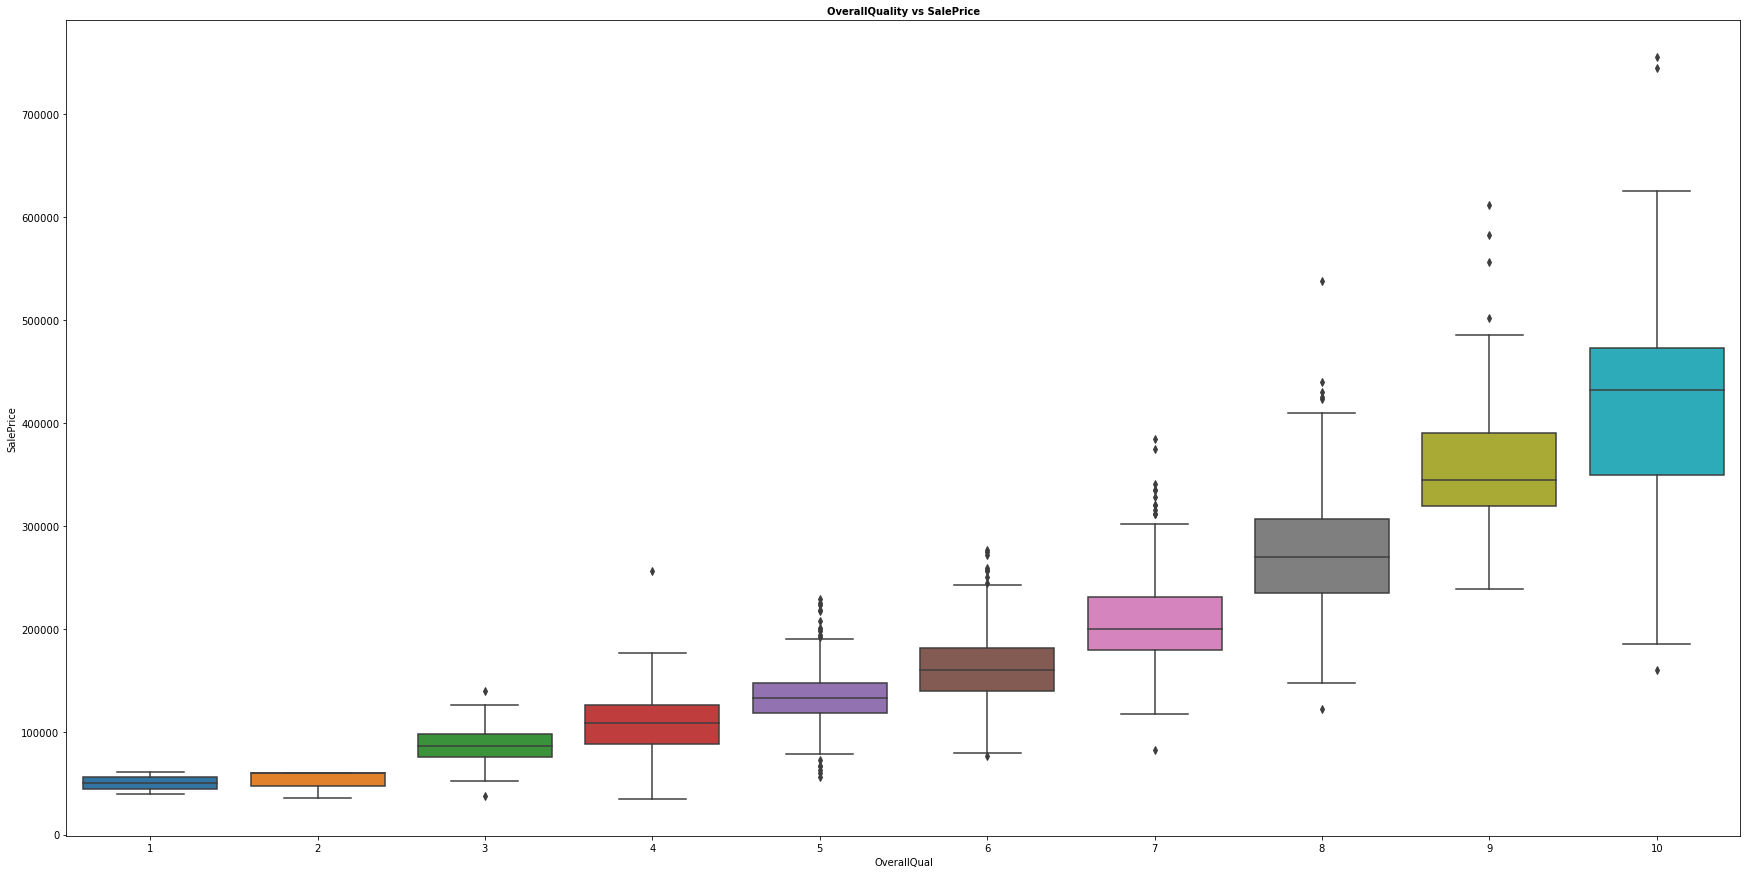

In [18]:
# Pretty good relationship here

fig = plt.figure(figsize=(30,15))
sns.boxplot(data=traindata, y='SalePrice', x='OverallQual')
plt.title('OverallQuality vs SalePrice', fontsize=10, weight='bold' )
plt.show()

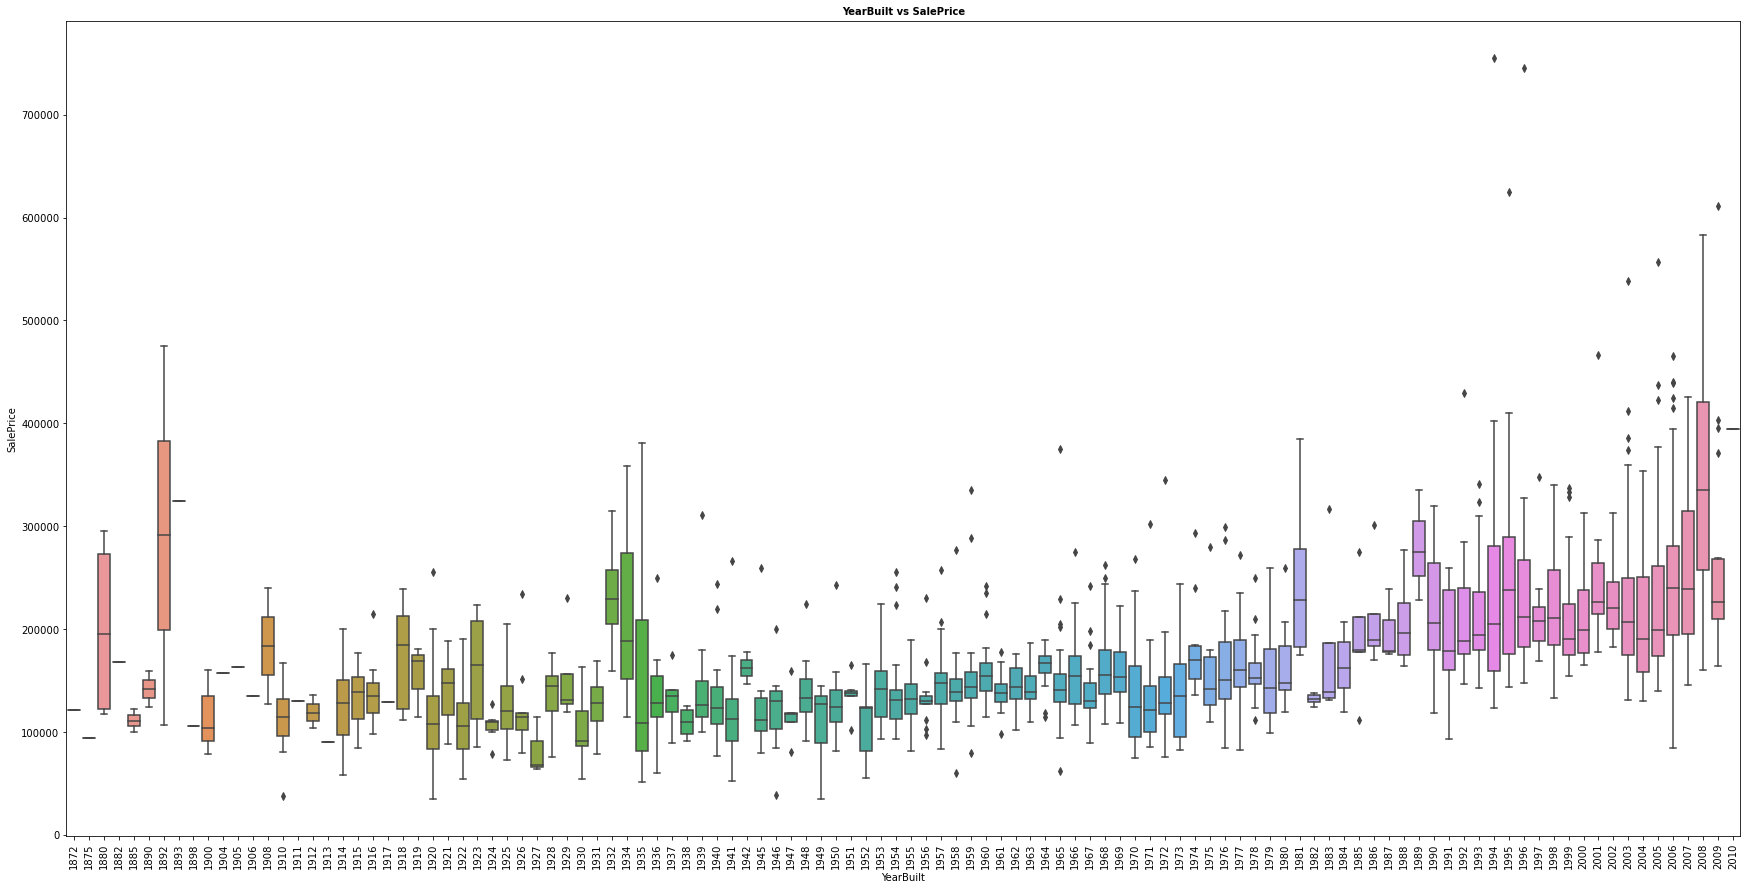

In [19]:
# Yearbuilt & saleprice

fig = plt.figure(figsize=(30,15))
sns.boxplot(data=traindata, y='SalePrice', x='YearBuilt')
plt.title('YearBuilt vs SalePrice', fontsize=10, weight='bold' )
plt.xticks(rotation=90)
plt.show()

* Although it's not a strong tendency, I'd say that 'SalePrice' is more prone to spend more money in newer houses than older ones.

* **Note**: we don't know if 'SalePrice' is in constant prices. Constant prices try to remove the effect of **inflation**. 

* If 'SalePrice' is not in constant prices, it should be, so than prices are comparable over the years.

## In summary

We can conclude that:

* 'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.
* 'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.

We just analysed four variables, but there are many other that we should analyse. The trick here seems to be the choice of the right features (feature selection) and not the definition of complex relationships between them (feature engineering).

That said, let's separate the wheat from the chaff.

## Correlations with integers

To explore further with the correlations, we will start with some practical recipes to make sense of our 'plasma soup':

* Correlation matrix (heatmap style).
* 'SalePrice' correlation matrix (zoomed heatmap style).
* Scatter plots between the most correlated variables (move like Jagger style).

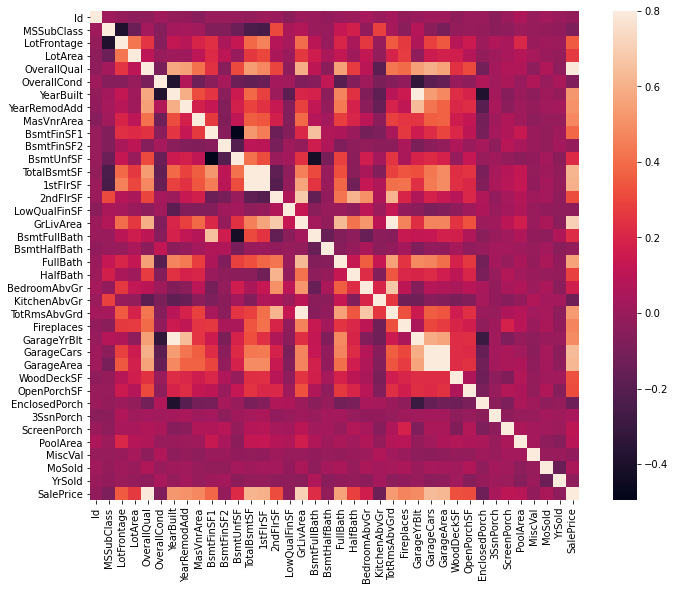

In [20]:
# Correlation matrix heatmap

corrmat = traindata.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

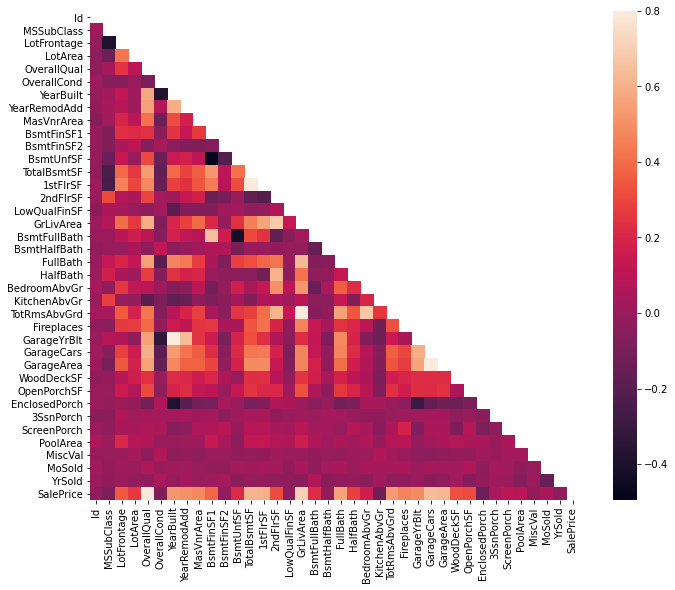

In [21]:
# Half of the correlation matrix heatmap

matrix = np.triu(traindata.corr())

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, mask=matrix);

* In my opinion, this heatmap is the best way to get a quick overview of our 'plasma soup' and its relationships. (Thank you @seaborn!)

* At first sight, there are two white colored squares that get my attention. The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables, and the second one refers to the 'GarageX' variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. Heatmaps are great to detect this kind of situations and in problems dominated by feature selection, like ours, they are an essential tool.

* Another thing that got my attention was the 'SalePrice' correlations. We can see our well-known 'GrLivArea', 'TotalBsmtSF', and 'OverallQual' saying a big 'Hi!', but we can also see many other variables that should be taken into account. That's what we will do next.

# Narrow down important correlations in the correlation matrix

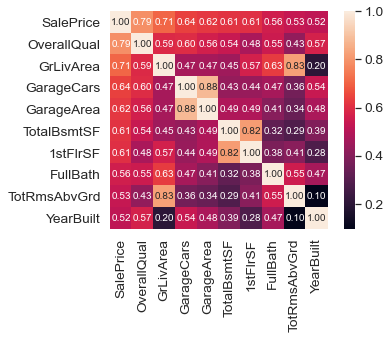

In [22]:
# saleprice correlation matrix

k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(traindata[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

According to the correlation matrix, these are the variables most correlated with 'SalePrice'. My thoughts on this:

* 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'.
* 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, as we discussed in the last sub-point, the number of cars that fit into the garage is a consequence of the garage area. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
* 'TotalBsmtSF' and '1stFloor' also seem to be similar.
* 'TotRmsAbvGrd' and 'GrLivArea' are also similar
* It seems that 'YearBuilt' is also slightly correlated with 'SalePrice'. 

Let's proceed to the scatter plots.

# Scatterplot correlation

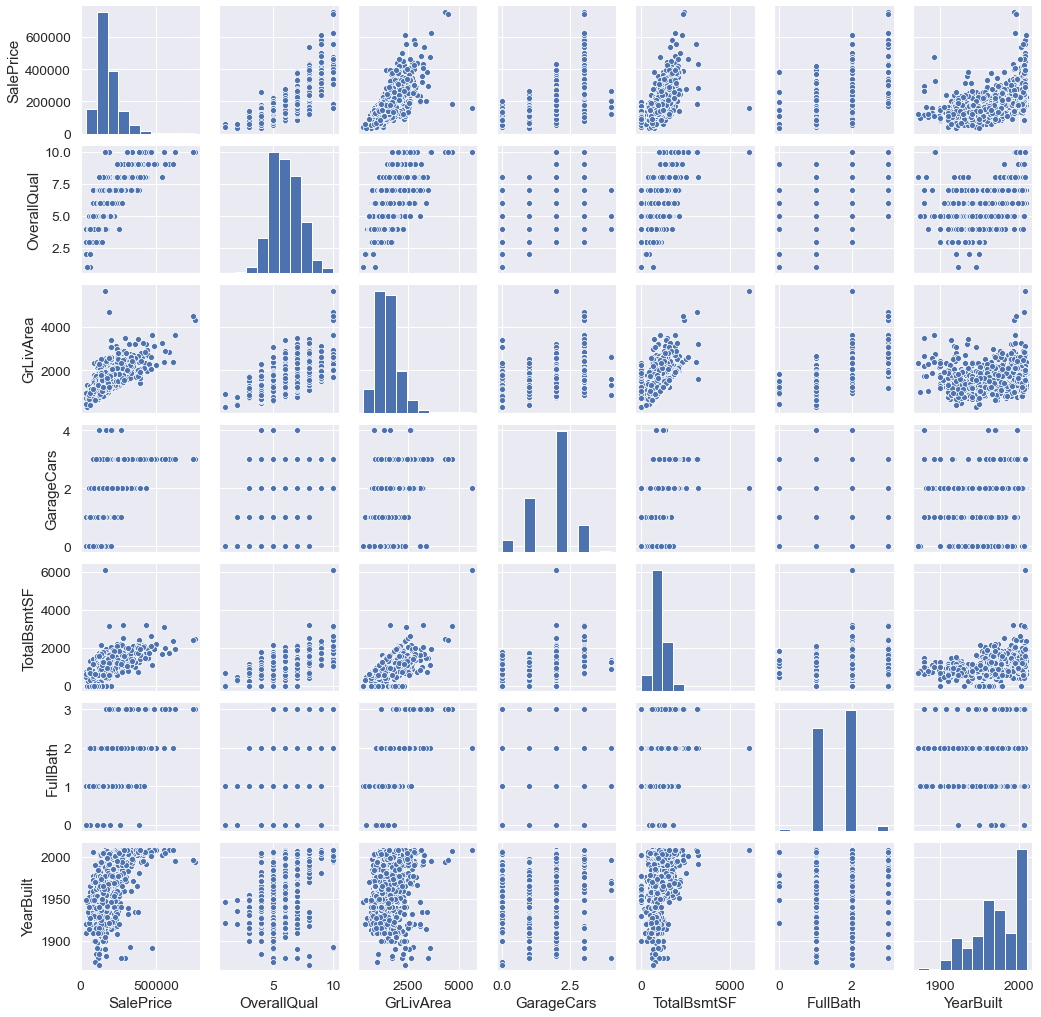

In [23]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(traindata[cols], height = 2)
plt.show();

* Although we already know some of the main figures, this mega scatter plot gives us a reasonable idea about variables relationships.

* One of the figures we may find interesting is the one between 'TotalBsmtSF' and 'GrLiveArea'. 
    * In this figure we can see the dots drawing a linear line, which almost acts like a border. 
    * It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area (unless you're trying to buy a bunker).
    * i.e. The floor ground area limits the basement area available during construction
    

* The plot concerning 'SalePrice' and 'YearBuilt' can also make us think. In the bottom of the 'dots cloud', we see what almost appears to be a shy exponential function (be creative). We can also see this same tendency in the upper limit of the 'dots cloud' (be even more creative). Also, notice how the set of dots regarding the last years tend to stay above this limit (I just wanted to say that prices are increasing faster now).

## Alternative method to visualise the correlation matrix

In [24]:
# Split the dataset to select only integers

num = traindata.select_dtypes(exclude='object')
num

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0          2003          2003       196.0         706           0        150   
1          1976          1976         0.0         978           0        284   
2          2001          2002       162.0         486           0        434   
3          1915          1970         0.0         216           0        540   
4          2000          2000       350.0         655           0        490   
...         ...           ...         ...         ...         ...        ...   
1455       1999          2000         0.0           0           0        953   
1456       1978          1988       119.0         790         163        589   
1457       1941          2006         0.0         275           0        877   
1458       1950          1996         0.0          49        1029          0   
1459       1965          1965         0.0         830         290        136   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0             856       856       854             0       1710             1   
1            1262      1262         0             0       1262             0   
2             920       920       866             0       1786             1   
3             756       961       756             0       1717             1   
4            1145      1145      1053             0       2198             1   
...           ...       ...       ...           ...        ...           ...   
1455          953       953       694             0       1647             0   
1456         1542      2073         0             0       2073             1   
1457         1152      1188      1152             0       2340             0   
1458         1078      1078         0             0       1078             1   
1459         1256      1256         0             0       1256             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0         1         0             3             1   
4                0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1455             0         2         1             3             1   
1456             0         2         0             3             1   
1457             0         2         0             4             1   
1458             0         1         0             2             1   
1459             0         1         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                8           0       2003.0           2         548   
1                6           1       1976.0           2         460   
2                6           1       2001.0           2         608   
3                7           1       1998.0           3         642   
4

In [25]:
# Narrow down the correlation window to specifically for saleprice

numcorr = num.corr()

SalePriceCorr = pd.DataFrame(numcorr['SalePrice'].sort_values(ascending=False), columns=['SalePrice'])

cm = sns.light_palette("orange", as_cmap=True)

SalePriceCorr.style.background_gradient(cmap=cm)

(array([0.5]), <a list of 1 Text major ticklabel objects>)

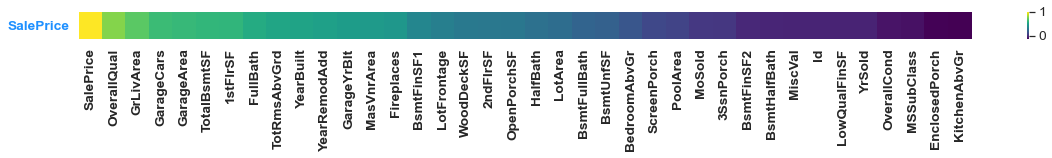

In [26]:
# Plot based on correlation to sale price from high to low

plt.figure(figsize=(20,0.5))
sns.heatmap(data=SalePriceCorr.transpose(), cmap='viridis')
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)

## Type of dwelling

In [27]:
BldgType = pd.DataFrame(traindata['BldgType'].value_counts())

cm = sns.light_palette("orange", as_cmap=True)

BldgType.style.background_gradient(cmap=cm)

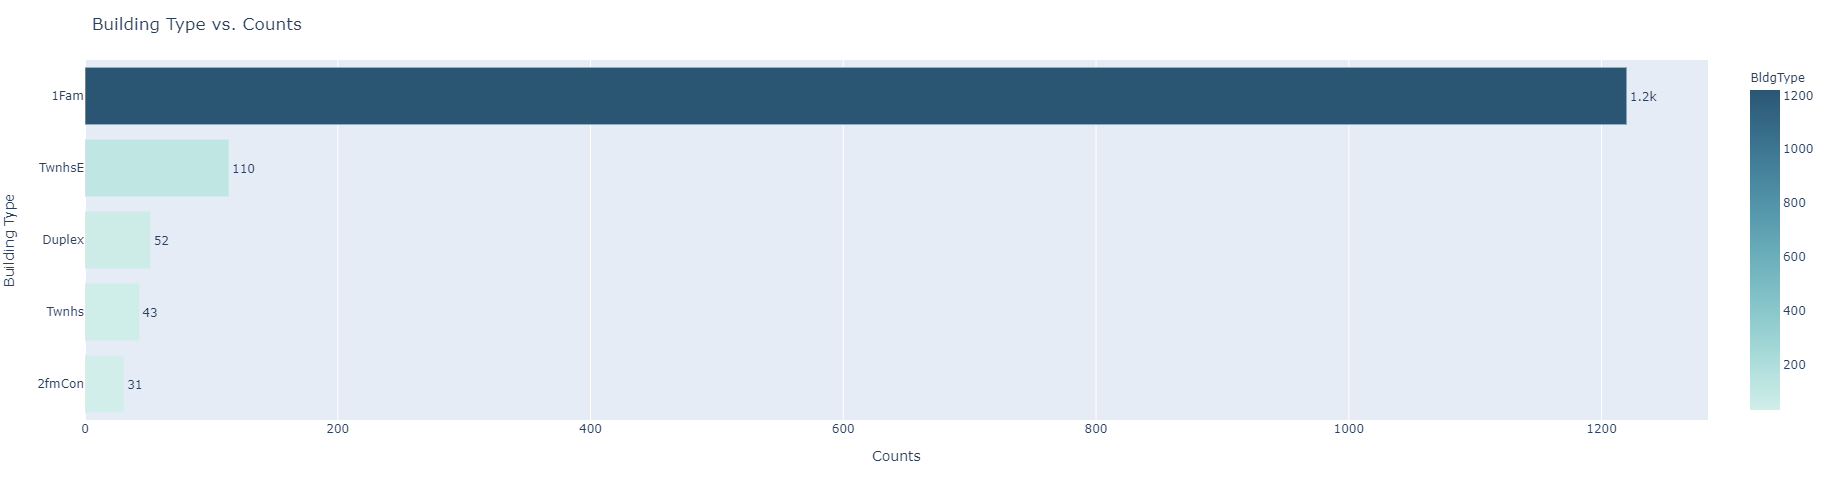

In [28]:
import plotly.graph_objects as go
import plotly.express as px


fig = px.bar(BldgType, x='BldgType', y=BldgType.index, text='BldgType', color='BldgType', orientation='h', width = 1000, height = 500, color_continuous_scale=px.colors.sequential.Teal)
fig.update_layout(
    title="Building Type vs. Counts",
    xaxis_title="Counts",
    yaxis_title="Building Type",)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig['layout']['yaxis']['autorange'] = "reversed"
fig.show()

* Ok, enough of feature exploring for now. Let's move forward to what's missing: missing data!

# Data Cleaning

Important questions when thinking about missing data:
* How prevalent is the missing data?
* Is missing data random or does it have a pattern?

    
The answer to these questions is important for practical reasons because missing data can imply a reduction of the sample size. 
* This can prevent us from proceeding with the analysis.
* Moreover, from a substantive perspective, we need to ensure that the missing data process is not biased and hidding an inconvenient truth.

To clean data:
* Set your own procedures for data cleaning
* E.g. - cleaning the data from missing values, setting the threshold to 80% for any columns with more than 80% missing values

## Combining both datasets

In [29]:
# Extracting the y_train value

y_train = traindata['SalePrice'].to_frame()

# Combine both train and test datasets to clean data

c1 = pd.concat((traindata, testdata), sort=False).reset_index(drop=True)
c1.drop(['SalePrice'], axis=1, inplace=True)
c1.drop(['Id'], axis=1, inplace=True)
print(c1.shape)
c1

(2919, 79)


MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
2914         160       RM         21.0     1936   Pave   NaN      Reg   
2915         160       RM         21.0     1894   Pave   NaN      Reg   
2916          20       RL        160.0    20000   Pave   NaN      Reg   
2917          85       RL         62.0    10441   Pave   NaN      Reg   
2918          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
2914         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
2915         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
2916         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
2917         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
2918         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
2914       Norm    Twnhs     2Story            4            7       1970   
2915       Norm   TwnhsE     2Story            4            5       1970   
2916       Norm     1Fam     1Story            5            7       1960   
2917       Norm     1Fam     SFoyer            5            5       1992   
2918       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
2914          1970     Gable  CompShg     CemntBd     CmentBd       None   
2915          1970     Gable  CompShg     CemntBd     CmentBd       None   
2916          1996     Gable  CompShg     VinylSd     VinylSd       None   
2917          1992     Gable  CompShg     HdBoard     Wd Shng       None   
2918          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   
4          350.0        Gd        TA      PConc       Gd       TA   


# Check how many NA values appear in the data

In [30]:
c1plot = pd.DataFrame(c1.isnull().sum().sort_values(ascending=False), columns=['Counts'])
c1plot

Counts
PoolQC         2909
MiscFeature    2814
Alley          2721
Fence          2348
FireplaceQu    1420
...             ...
1stFlrSF          0
CentralAir        0
Heating           0
Foundation        0
MSSubClass        0

[79 rows x 1 columns]

Let's analyse this to understand how to handle the missing data:

* We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed. 
* This means that we will not try any trick to fill the missing data in these cases. According to this, there is a set of variables (e.g. 'PoolQC', 'MiscFeature', 'Alley', etc.) that we should delete. 
* The point is: will we miss this data? I don't think so. None of these variables seem to be very important, since most of them are not aspects in which we think about when buying a house (maybe that's the reason why data is missing?). 
* Moreover, looking closer at the variables, we could say that variables like 'PoolQC', 'MiscFeature' and 'FireplaceQu' are strong candidates for outliers, so we'll be happy to delete them.

In what concerns the remaining cases, we can see that 'GarageX' variables have the same number of missing data. 
* I bet missing data refers to the same set of observations (although I will not check it; it's just 5% and we should not spend 20 in5  problems). 
* Since the most important information regarding garages is expressed by 'GarageCars' and considering that we are just talking about 5% of missing data, I'll delete the mentioned 'GarageX' variables. 
* The same logic applies to 'BsmtX' variables.

Regarding 'MasVnrArea' and 'MasVnrType', we can consider that these variables are not essential. Furthermore, they have a strong correlation with 'YearBuilt' and 'OverallQual' which are already considered. Thus, we will not lose information if we delete 'MasVnrArea' and 'MasVnrType'.

Finally, we have one missing observation in 'Electrical'. Since it is just one observation, we'll delete this observation and keep the variable.

In summary, to handle missing data, we'll delete all the variables with missing data, except the variable 'Electrical'. In 'Electrical' we'll just delete the observation with missing data.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]),
 <a list of 79 Text major ticklabel objects>)

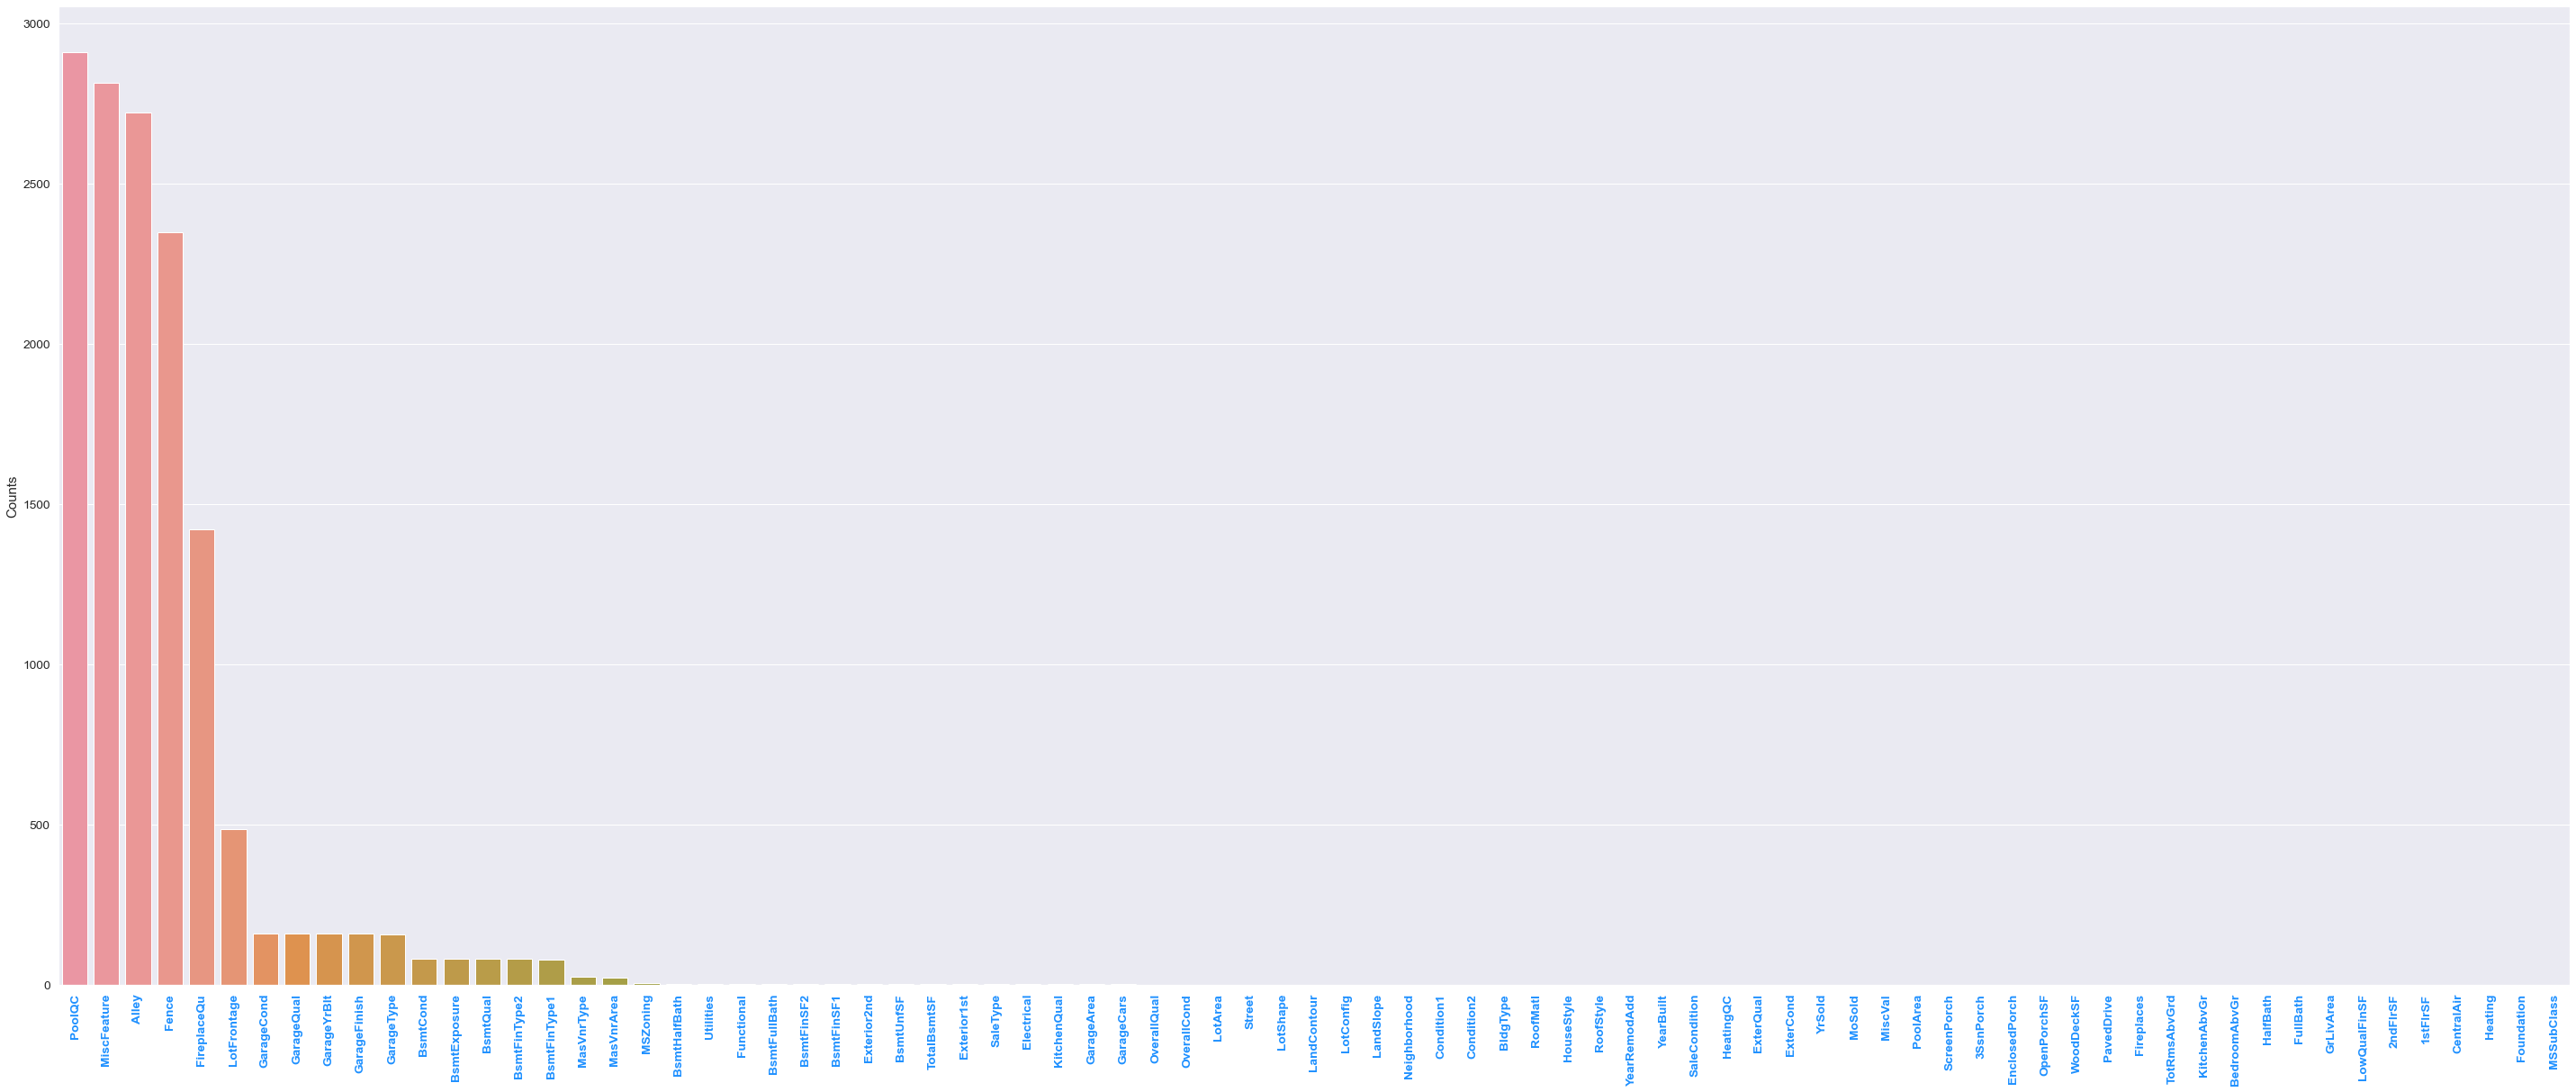

In [31]:
plt.figure(figsize = (50,20))
sns.barplot(y=c1plot['Counts'], x=c1plot.index)
plt.xticks(weight='bold', color='dodgerblue', rotation=90)

## Filtering out values >1

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 <a list of 23 Text major ticklabel objects>)

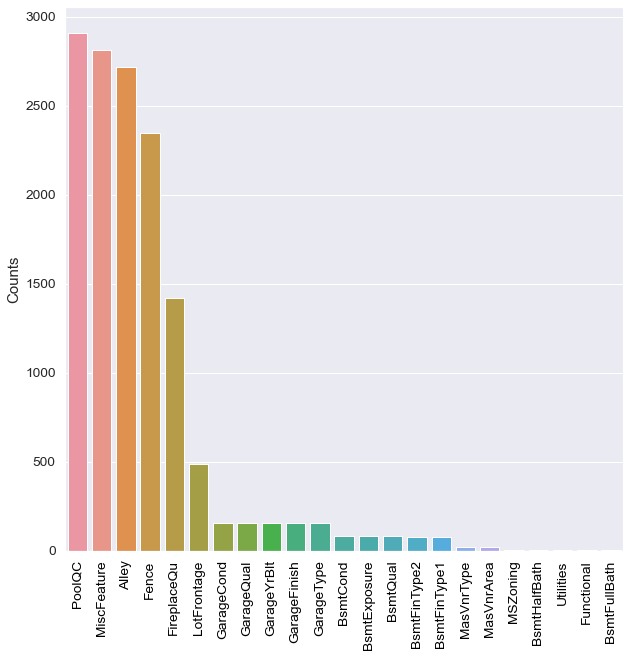

In [32]:
# Need to filter out redundant data!
filtered = c1plot.loc[c1plot['Counts'] > 1]

plt.figure(figsize = (10,10))
sns.barplot(y=filtered['Counts'], x=filtered.index)
plt.xticks(color='black', rotation=90)

## Visualising with plotly.express

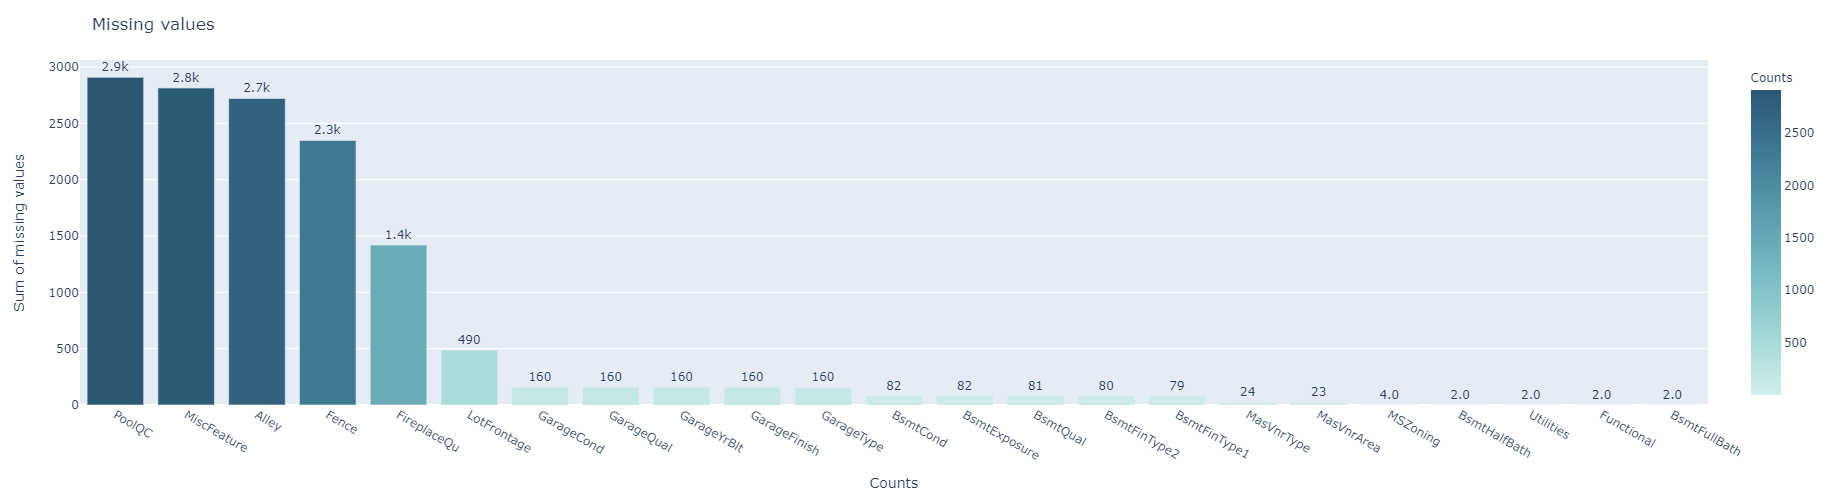

In [33]:
import plotly.graph_objects as go
import plotly.express as px


fig = px.bar(filtered, y='Counts', x=filtered.index, text='Counts', color='Counts', orientation='v', width = 1000, height = 500, color_continuous_scale=px.colors.sequential.Teal)
fig.update_layout(
    title="Missing values",
    xaxis_title="Counts",
    yaxis_title="Sum of missing values",)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
# fig['layout']['yaxis']['autorange'] = "reversed"
fig.show()

# Using mean instead of sum to get percentages

* It's better to use mean to remove percentage rather than sum as you don't want to sacrifice information for more accurate model
* First thing to do is get rid of the features with more than 80% missing values (figure below). 
* For example the PoolQC's missing values are probably due to the lack of pools in some buildings, which is very logical. 
* But replacing those (more than 80%) missing values with "no pool" will leave us with a feature with low variance, and **low variance features are uniformative** for machine learning models. 
* So we should drop the features with more than 80% missing values.

In [34]:
# Calculate how many times null values appear (true) and compute the mean - percentage

c1.isnull().mean()

MSSubClass       0.000000
MSZoning         0.001370
LotFrontage      0.166495
LotArea          0.000000
Street           0.000000
                   ...   
MiscVal          0.000000
MoSold           0.000000
YrSold           0.000000
SaleType         0.000343
SaleCondition    0.000000
Length: 79, dtype: float64

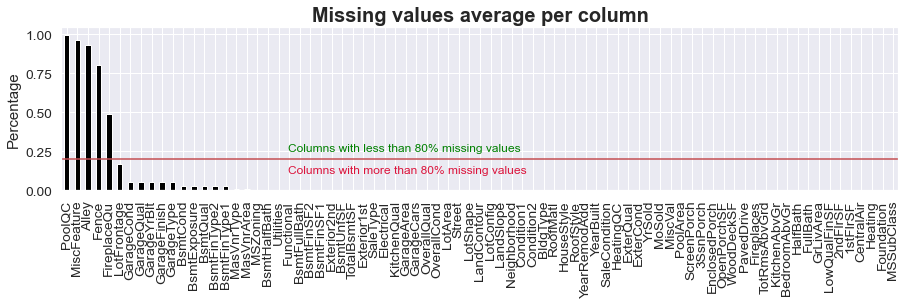

In [35]:
plt.figure(figsize=(15,3))
c1.isnull().mean().sort_values(ascending=False).plot.bar(color='black')
plt.axhline(y=0.2, color='r', linestyle='-')
plt.title('Missing values average per column', fontsize=20, weight='bold' )
plt.ylabel('Percentage')

plt.text(20.90, 0.305, 'Columns with less than 80% missing values', fontsize=12, color='green',
         ha='left' ,va='top')
plt.text(20.90, 0.165, 'Columns with more than 80% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')

plt.show()

* Good news! Most of the features are clean from missing values

* We combine first the train and test datasets to run all the data munging and feature engineering on both of them.

# Dropping columns above a certain NA threshold value

In [36]:
c1.shape

(2919, 79)

In [37]:
c1.shape
print('There are %s columns.' % (c1.shape[1]))

There are 79 columns.


In [38]:
# Using dropna threhold to remove columns that have > 80 % missing NA values, using sum Na values/total no. of rows
# These columns should be PoolQC, miscfeature, alley, fence and fireplace quality

c2 = c1.dropna(thresh=len(c1)*0.8, axis=1)
print('There are %s columns.' % (c2.shape[1]))
print('%s columns have been dropped.' % (c1.shape[1]-c2.shape[1]))

There are 74 columns.
5 columns have been dropped.


# Fill in missing values that are below the threshold

In [39]:
# Find out what NA values are still remaining

c2.isnull().sum().sort_values(ascending=False)

LotFrontage     486
GarageCond      159
GarageQual      159
GarageYrBlt     159
GarageFinish    159
               ... 
1stFlrSF          0
CentralAir        0
HeatingQC         0
Heating           0
MSSubClass        0
Length: 74, dtype: int64

In [40]:
# Convert the NA values into percentages of the whole column 

c2plot = pd.DataFrame(c2.isnull().mean().sort_values(ascending=False)*100, columns=['Percentage'])
c2plot

Percentage
LotFrontage    16.649538
GarageCond      5.447071
GarageQual      5.447071
GarageYrBlt     5.447071
GarageFinish    5.447071
...                  ...
1stFlrSF        0.000000
CentralAir      0.000000
HeatingQC       0.000000
Heating         0.000000
MSSubClass      0.000000

[74 rows x 1 columns]

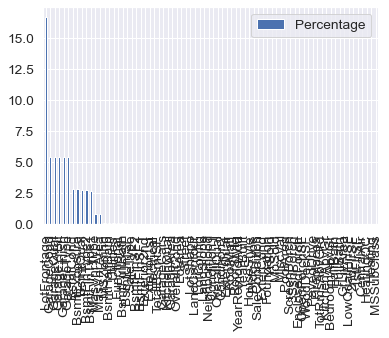

In [41]:
c2plot.plot.bar()

# Looks like this is too unreadable!

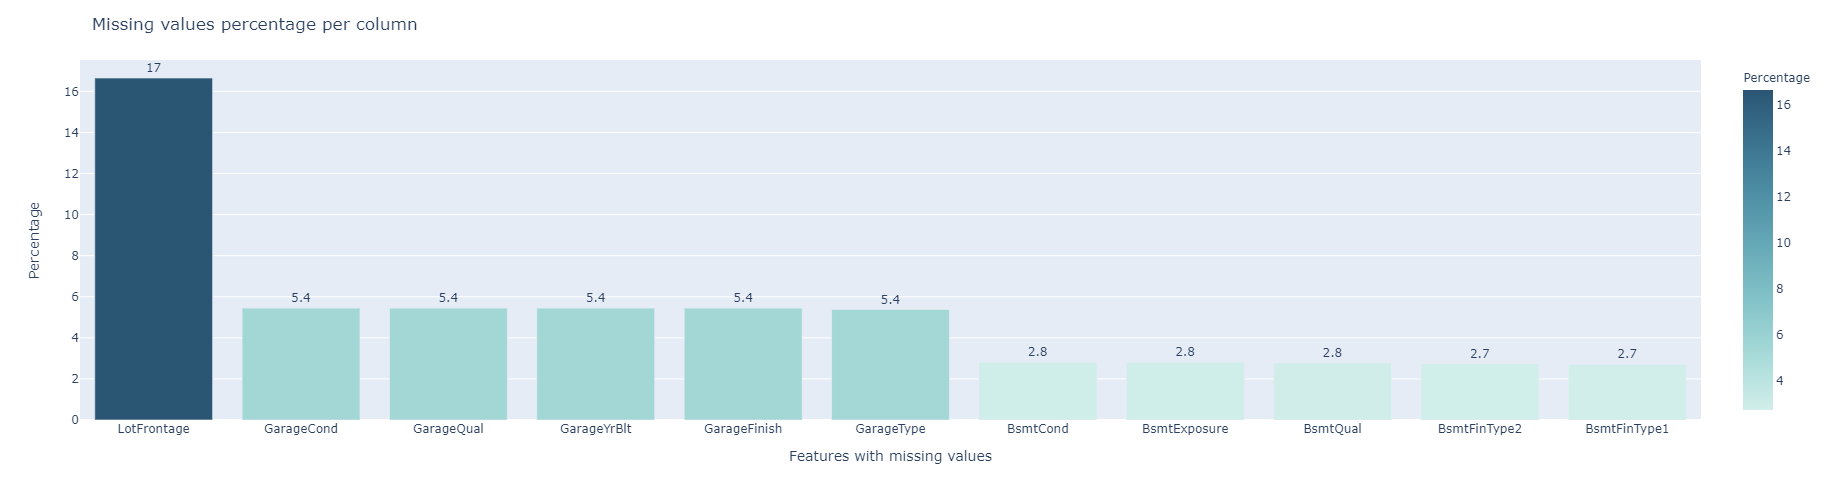

In [42]:
# Zoom in on missing values, into a more readable format
filtered = c2plot.loc[c2plot['Percentage'] > 1]
filtered

import plotly.graph_objects as go
import plotly.express as px

fig = px.bar(filtered, y='Percentage', x=filtered.index, text='Percentage', color='Percentage', orientation='v', width = 1000, height = 500, color_continuous_scale=px.colors.sequential.Teal)
fig.update_layout(
    title="Missing values percentage per column",
    xaxis_title="Features with missing values",
    yaxis_title="Percentage",)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
# fig['layout']['yaxis']['autorange'] = "reversed"
fig.show()

In [43]:
c2NAsum = c2.isnull().sum().sort_values(ascending=False) 
c2NAsum

LotFrontage     486
GarageCond      159
GarageQual      159
GarageYrBlt     159
GarageFinish    159
               ... 
1stFlrSF          0
CentralAir        0
HeatingQC         0
Heating           0
MSSubClass        0
Length: 74, dtype: int64

In [44]:
# Find only the rows with more than 0 missing values
c2NAsum = c2NAsum.loc[c2NAsum!=0]
c2NAsum

LotFrontage     486
GarageCond      159
GarageQual      159
GarageYrBlt     159
GarageFinish    159
GarageType      157
BsmtCond         82
BsmtExposure     82
BsmtQual         81
BsmtFinType2     80
BsmtFinType1     79
MasVnrType       24
MasVnrArea       23
MSZoning          4
BsmtHalfBath      2
Utilities         2
Functional        2
BsmtFullBath      2
BsmtUnfSF         1
SaleType          1
BsmtFinSF2        1
BsmtFinSF1        1
Exterior2nd       1
Exterior1st       1
Electrical        1
TotalBsmtSF       1
GarageCars        1
KitchenQual       1
GarageArea        1
dtype: int64

In [45]:
# Convert the pandas series to dataframe

c2NAsum = pd.DataFrame(c2NAsum, columns=['Missing_Val'])
c2NAsum

Missing_Val
LotFrontage           486
GarageCond            159
GarageQual            159
GarageYrBlt           159
GarageFinish          159
GarageType            157
BsmtCond               82
BsmtExposure           82
BsmtQual               81
BsmtFinType2           80
BsmtFinType1           79
MasVnrType             24
MasVnrArea             23
MSZoning                4
BsmtHalfBath            2
Utilities               2
Functional              2
BsmtFullBath            2
BsmtUnfSF               1
SaleType                1
BsmtFinSF2              1
BsmtFinSF1              1
Exterior2nd             1
Exterior1st             1
Electrical              1
TotalBsmtSF             1
GarageCars              1
KitchenQual             1
GarageArea              1

In [46]:
# Convert the index labels to a list format to extract columns from the orignial dataset

c2NAcol = c2NAsum.index.tolist()
c2NAcol

['LotFrontage',
 'GarageCond',
 'GarageQual',
 'GarageYrBlt',
 'GarageFinish',
 'GarageType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtQual',
 'BsmtFinType2',
 'BsmtFinType1',
 'MasVnrType',
 'MasVnrArea',
 'MSZoning',
 'BsmtHalfBath',
 'Utilities',
 'Functional',
 'BsmtFullBath',
 'BsmtUnfSF',
 'SaleType',
 'BsmtFinSF2',
 'BsmtFinSF1',
 'Exterior2nd',
 'Exterior1st',
 'Electrical',
 'TotalBsmtSF',
 'GarageCars',
 'KitchenQual',
 'GarageArea']

In [47]:
# Filtering columns in the c2 dataset that has NA values

NA = c2[c2NAcol]
NA

LotFrontage GarageCond GarageQual  GarageYrBlt GarageFinish GarageType  \
0            65.0         TA         TA       2003.0          RFn     Attchd   
1            80.0         TA         TA       1976.0          RFn     Attchd   
2            68.0         TA         TA       2001.0          RFn     Attchd   
3            60.0         TA         TA       1998.0          Unf     Detchd   
4            84.0         TA         TA       2000.0          RFn     Attchd   
...           ...        ...        ...          ...          ...        ...   
2914         21.0        NaN        NaN          NaN          NaN        NaN   
2915         21.0         TA         TA       1970.0          Unf    CarPort   
2916        160.0         TA         TA       1960.0          Unf     Detchd   
2917         62.0        NaN        NaN          NaN          NaN        NaN   
2918         74.0         TA         TA       1993.0          Fin     Attchd   

     BsmtCond BsmtExposure BsmtQual BsmtFinType2 BsmtFinType1 MasVnrType  \
0          TA           No       Gd          Unf          GLQ    BrkFace   
1          TA           Gd       Gd          Unf          ALQ       None   
2          TA           Mn       Gd          Unf          GLQ    BrkFace   
3          Gd           No       TA          Unf          ALQ       None   
4          TA           Av       Gd          Unf          GLQ    BrkFace   
...       ...          ...      ...          ...          ...        ...   
2914       TA           No       TA          Unf          Unf       None   
2915       TA           No       TA          Unf          Rec       None   
2916       TA           No       TA          Unf          ALQ       None   
2917       TA           Av       Gd          Unf          GLQ       None   
2918       TA           Av       Gd          Unf          LwQ    BrkFace   

      MasVnrArea MSZoning  BsmtHalfBath Utilities Functional  BsmtFullBath  \
0          196.0       RL           0.0    AllPub        Typ           1.0   
1            0.0       RL           1.0    AllPub        Typ           0.0   
2          162.0       RL           0.0    AllPub        Typ           1.0   
3            0.0       RL           0.0    AllPub        Typ           1.0   
4          350.0       RL           0.0    AllPub        Typ           1.0   
...          ...      ...           ...       ...        ...           ...   
2914         0.0       RM           0.0    AllPub        Typ           0.0   
2915         0.0       RM           0.0    AllPub        Typ           0.0   
2916         0.0       RL           0.0    AllPub        Typ           1.0   
2917         0.0       RL           1.0    AllPub        Typ           0.0   
2918        94.0       RL           0.0    AllPub        Typ           0.0   

      BsmtUnfSF SaleType  BsmtFinSF2  BsmtFinSF1 Exterior2nd Exterior1st  \
0         150.0       WD         0.0       706.0     VinylSd     VinylSd   
1         284.0       WD         0.0       978.0     MetalSd     MetalSd   
2         434.0       WD         0.0       486.0     VinylSd     VinylSd   
3         540.0       WD         0.0       216.0     Wd Shng     Wd Sdng   
4         490.0       WD         0.0       655.0     VinylSd     VinylSd   
...         ...      ...         ...         ...         ...         ...   
2914      546.0       WD         0.0         0.0     CmentBd     CemntBd   
2915      294.0       WD         0.0       252.0     CmentBd     CemntBd   
2916        0.0       WD         0.0      1224.0     VinylSd     VinylSd   
2917      575.0       WD         0.0       337.0     Wd Shng     HdBoard   
2918      238.0       WD         0.0       758.0     HdBoard     HdBoard   

     Electrical  TotalBsmtSF  GarageCars KitchenQual  GarageArea  
0         SBrkr        856.0         2.0          Gd       548.0  
1         SBrkr       1262.0         2.0          TA       460.0  
2         SBrkr        920.0         2.0          Gd       608.0  
3         SBrk

We need to now split the NA data into:
* Categorical fatures
* Numerical features

In [48]:
# Filtering the NA columns by numerical and categorical

NAnum=NA.select_dtypes(exclude='object') # Numerical features
NAcat=NA.select_dtypes(include='object') # Categorical features

print('We have :',NAnum.shape[1],'numerical features with missing values')
print('We have :',NAcat.shape[1],'categorical features with missing values')

We have : 11 numerical features with missing values
We have : 18 categorical features with missing values


So, 11 numerical features and 18 categorical features to clean.

* We start with the **numerical features**, first thing to do is have a look at them to learn more about their distribution and decide how to clean them:
* Most of the features are going to be filled with 0s because we assume that they don't exist, for example GarageArea, GarageCars with missing values are simply because the house lacks a garage.
* GarageYrBlt: Year garage was built can't be filled with 0s, so we fill with the median (1980).

# Numerical Features to fillNA

In [49]:
NAnum.head()

LotFrontage  GarageYrBlt  MasVnrArea  BsmtHalfBath  BsmtFullBath  \
0         65.0       2003.0       196.0           0.0           1.0   
1         80.0       1976.0         0.0           1.0           0.0   
2         68.0       2001.0       162.0           0.0           1.0   
3         60.0       1998.0         0.0           0.0           1.0   
4         84.0       2000.0       350.0           0.0           1.0   

   BsmtUnfSF  BsmtFinSF2  BsmtFinSF1  TotalBsmtSF  GarageCars  GarageArea  
0      150.0         0.0       706.0        856.0         2.0       548.0  
1      284.0         0.0       978.0       1262.0         2.0       460.0  
2      434.0         0.0       486.0        920.0         2.0       608.0  
3      540.0         0.0       216.0        756.0         3.0       642.0  
4      490.0         0.0       655.0       1145.0         3.0       836.0

In [50]:
NAnumDF = pd.DataFrame(NAnum.isnull().sum().sort_values(ascending=False))

cm = sns.light_palette("orange", as_cmap=True)

NAnumDF.style.background_gradient(cmap=cm)

In [51]:
c2['BsmtUnfSF'].isnull().value_counts()

False    2918
True        1
Name: BsmtUnfSF, dtype: int64

In [52]:
#LotFrontage has 16% missing values. We fill with the median

c2['LotFrontage'].fillna(c2['LotFrontage'].median(), inplace=True)

#GarageYrBlt:  Year garage was built, we fill the gaps with the median: 1980

c2['GarageYrBlt'].fillna(1980, inplace=True)

# MasVnrArea: Masonry veneer area in square feet, the missing data means no veneer so we fill with 0

c2['MasVnrArea'].fillna(0, inplace=True)

# Loop to replace the selected columns with NA with 0

cols_fillna = ['BsmtFullBath', 'BsmtHalfBath', 'GarageArea', 'TotalBsmtSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']
for col in cols_fillna:
    c2[col].fillna(0,inplace=True)

C:\Users\Alistair\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Categorical Features to fillNA

* And we have 18 Categorical features with missing values:

* Some features have just 1 or 2 missing values, so we will just use the forward fill method because they are obviously values that can't be filled with 'None's

* Features with many missing values are mostly basement and garage related (same as in numerical features) so as we did with numerical features (filling them with 0s), we will fill the categorical missing values with "None"s assuming that the houses lack basements and garages.

In [53]:
NAcat.head()

GarageCond GarageQual GarageFinish GarageType BsmtCond BsmtExposure  \
0         TA         TA          RFn     Attchd       TA           No   
1         TA         TA          RFn     Attchd       TA           Gd   
2         TA         TA          RFn     Attchd       TA           Mn   
3         TA         TA          Unf     Detchd       Gd           No   
4         TA         TA          RFn     Attchd       TA           Av   

  BsmtQual BsmtFinType2 BsmtFinType1 MasVnrType MSZoning Utilities Functional  \
0       Gd          Unf          GLQ    BrkFace       RL    AllPub        Typ   
1       Gd          Unf          ALQ       None       RL    AllPub        Typ   
2       Gd          Unf          GLQ    BrkFace       RL    AllPub        Typ   
3       TA          Unf          ALQ       None       RL    AllPub        Typ   
4       Gd          Unf          GLQ    BrkFace       RL    AllPub        Typ   

  SaleType Exterior2nd Exterior1st Electrical KitchenQual  
0       WD     VinylSd     VinylSd      SBrkr          Gd  
1       WD     MetalSd     MetalSd      SBrkr          TA  
2       WD     VinylSd     VinylSd      SBrkr          Gd  
3       WD     Wd Shng     Wd Sdng      SBrkr          Gd  
4       WD     VinylSd     VinylSd      SBrkr          Gd

In [54]:
NAcatDF = pd.DataFrame(NAcat.isnull().sum().sort_values(ascending=False), columns=['Missing_Val'])

cm = sns.light_palette("orange", as_cmap=True)

NAcatDF.style.background_gradient(cmap=cm)

In [55]:
# Filter out range of values to replace

NAcatDF2 = NAcatDF.loc[NAcatDF['Missing_Val'] >0]
NAcatDF2 = NAcatDF.loc[NAcatDF['Missing_Val'] <5]
NAcatDF2 

Missing_Val
MSZoning               4
Utilities              2
Functional             2
Electrical             1
SaleType               1
Exterior2nd            1
Exterior1st            1
KitchenQual            1

In [56]:
# Convert index to list to filter out

cols_fillna = NAcatDF2.index.tolist()
cols_fillna

['MSZoning',
 'Utilities',
 'Functional',
 'Electrical',
 'SaleType',
 'Exterior2nd',
 'Exterior1st',
 'KitchenQual']

In [57]:
# We start with features having just few missing value:  We fill the gap with forward fill method:
# Might not be the best way to do it?

for col in cols_fillna:
    c2[col].fillna(method='ffill',inplace=True)

C:\Users\Alistair\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
# Replace all other values with None for object and 0 for numeric

NAcols=c2.columns

#Numerical missing values
for col in NAcols:
    if c2[col].dtype != "object":
        c2[col].fillna(0, inplace=True)

for col in NAcols:
    if c2[col].dtype == "object":
        c2[col].fillna('None', inplace=True)

In [59]:
# Check all the null values are gone
# We now have a clean dataset!

c2.isnull().sum().sort_values(ascending=False)

SaleCondition    0
YearRemodAdd     0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
                ..
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
MSSubClass       0
Length: 74, dtype: int64

# Feature Engineering

In [60]:
c2.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

* Since the area is a very important variable, we will create a new feature "TotalArea" that sums the area of all the floors and the basement.

* Bathrooms: All the bathroom in the ground floor

* Year average: The average of the sum of the year the house was built and the year the house was remodeled 

Feature engineering is very important to improve the model's performance, I will start in this kernel just with the TotalArea, Bathrooms and average year features and will keep updating the kernel by creating new features.

This part of the kernel from the Kaggle website is not finished yet.

In [61]:
c2['TotalArea'] = c2['TotalBsmtSF'] + c2['1stFlrSF'] + c2['2ndFlrSF'] + c2['GrLivArea'] +c2['GarageArea']

c2['Bathrooms'] = c2['FullBath'] + c2['HalfBath']*0.5 

c2['Year average']= (c2['YearRemodAdd']+c2['YearBuilt'])/2

C:\Users\Alistair\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Alistair\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Alistair\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

# Encoding categorical features:

## Numerical features

* We start with numerical features that are actually categorical, for example in "Month sold", the values are from 1 to 12, each number is assigned to a month November is number 11 while March is number 3. 
* 11 is just the order of the months and not a given value, so we convert the "Month Sold" feature to categorical

In [62]:
c2['MSSubClass'] = pd.Categorical(c2['MSSubClass'])
c2['YrSold'] = pd.Categorical(c2['YrSold'])

C:\Users\Alistair\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Alistair\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Get_dummies encoding

More information on how get_dummies work here: https://medium.com/swlh/dummying-down-get-dummies-one-hot-encoding-for-ml-pipeline-56ac8c638433

In [63]:
c3=pd.get_dummies(c2)
print("the shape of the original dataset",c2.shape)
print("the shape of the encoded dataset",c3.shape)
print("We have ",c3.shape[1]- c2.shape[1], 'new encoded features')

the shape of the original dataset (2919, 77)
the shape of the encoded dataset (2919, 301)
We have  224 new encoded features


We are done with the cleaning and feature engineering. Now, we split the combined dataset to the original train and test sets

# Split cleaned dataset back into train and test

In [64]:
na = traindata.shape[0]
nb = testdata.shape[0]

# Split the c3 dataframe back into training and testing

Train = c3[:na]  #na is the number of rows of the original training set
Test = c3[na:] 

# Outliers Detection

## Outliers Visualisation

* Outliers is also something that we should be aware of. Why? Because outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

* Outliers is a complex subject and it deserves more attention. Here, we'll just do a quick analysis through the standard deviation of 'SalePrice' and a set of scatter plots.

* This part of the kernel will be a little bit messy. 

* I didn't want to deal with the outliers in the combined dataset to keep the shape of the original train and test datasets. Dropping them would shift the location of the rows.

    * If you know a better solution to this, I will be more than happy to read your recommandations.

    * OK. So we go back to our original train dataset to visualize the important features / Sale price scatter plot to find outliers

# Violin plot to observe outliers

<img src = https://miro.medium.com/max/1040/1*TTMOaNG1o4PgQd-e8LurMg.png>

# Numerical features

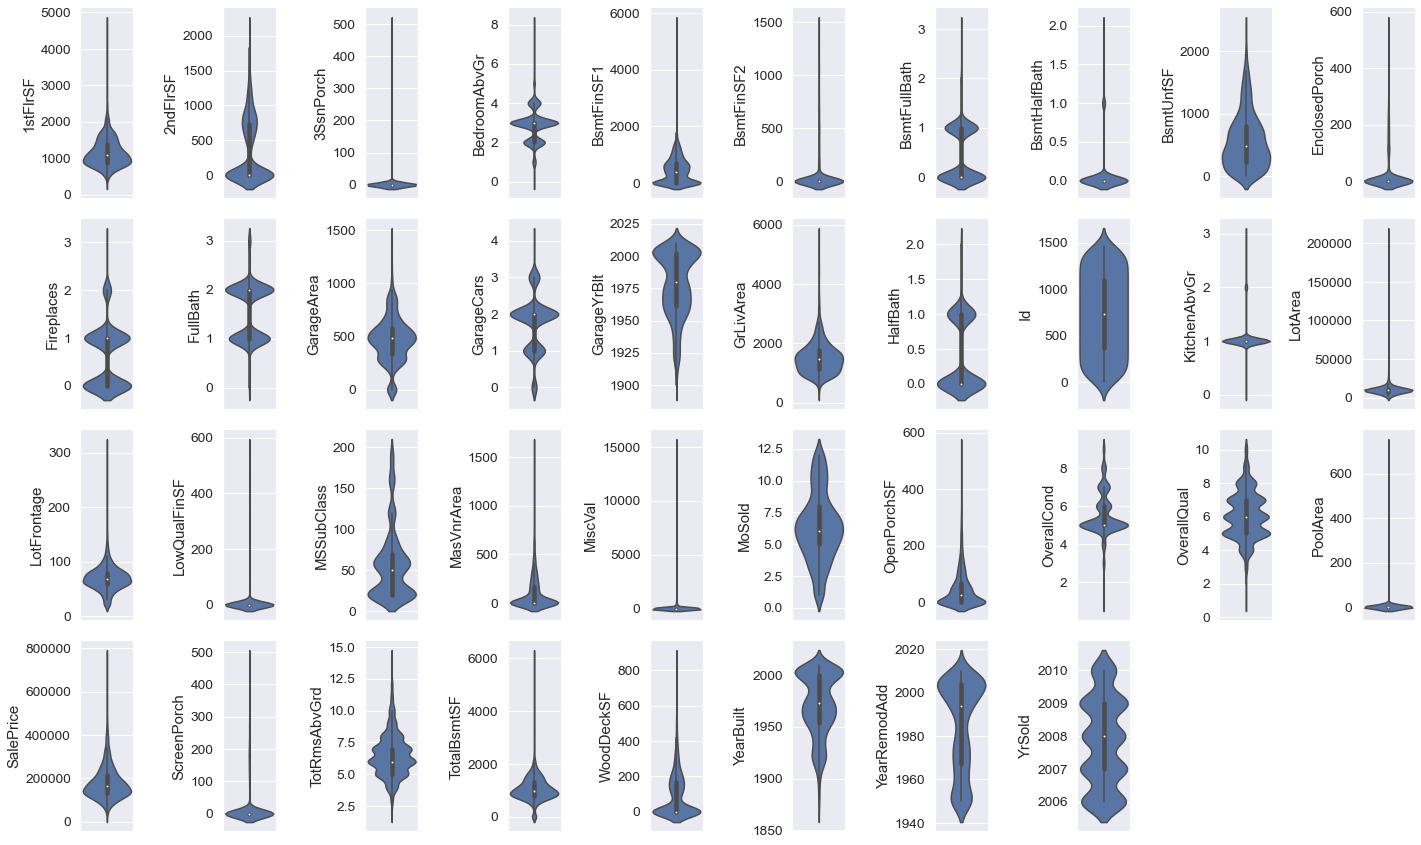

In [65]:
# Violin plots shows the probabillity density of the data at different values

cols = sorted(num.columns.tolist())

plt.figure(figsize=[20,12])

counter = 0
index = 1

for col in cols :
    plt.subplot(4,10,index)
    sns.violinplot(data= traindata, x=cols[counter], orient='v')
    sns.despine()
    index += 1
    counter += 1
    
plt.tight_layout()
plt.show()

# From these violinplot we can easily deduce that there are quite a few outliers in the lotArea, bsmtHalfBath, MiscVal and others features.
# These Outliers will be treated by magic later.

# Plotting outliers in the numerical features

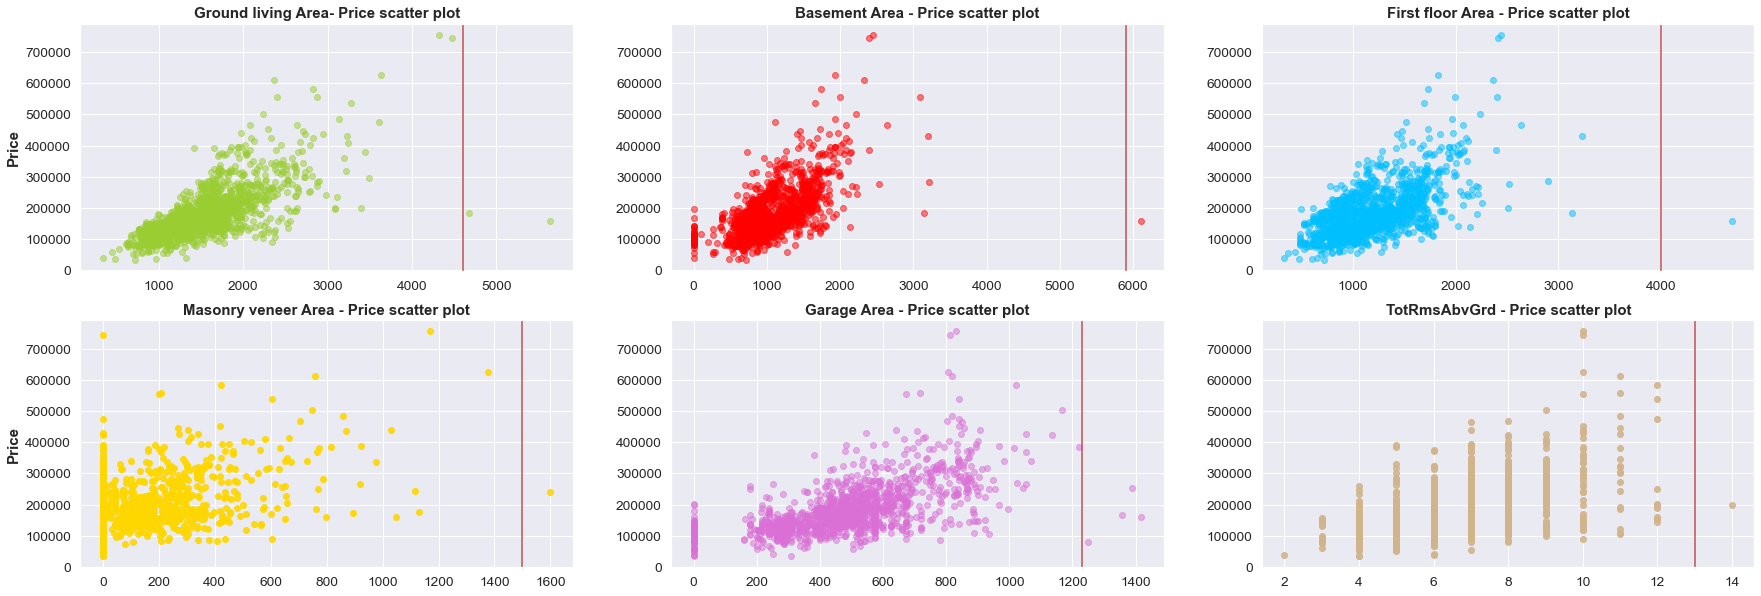

In [66]:
# Try looping the graph below

fig = plt.figure(figsize=(30,10))

cols = 3
rows = 2


ax1 = plt.subplot2grid((rows ,cols),(0,0))
plt.scatter(x=traindata['GrLivArea'], y=traindata['SalePrice'], color=('yellowgreen'), alpha=0.5)
plt.axvline(x=4600, color='r', linestyle='-')
plt.title('Ground living Area- Price scatter plot', fontsize=15, weight='bold' )
plt.ylabel('Price', fontsize=15, weight='bold' )
plt.grid(b=True)

ax1 = plt.subplot2grid((rows,cols),(0,1))
plt.scatter(x=traindata['TotalBsmtSF'], y=traindata['SalePrice'], color=('red'),alpha=0.5)
plt.axvline(x=5900, color='r', linestyle='-')
plt.title('Basement Area - Price scatter plot', fontsize=15, weight='bold' )
plt.grid(b=True)

ax1 = plt.subplot2grid((rows,cols),(0,2))
plt.scatter(x=traindata['1stFlrSF'], y=traindata['SalePrice'], color=('deepskyblue'),alpha=0.5)
plt.axvline(x=4000, color='r', linestyle='-')
plt.title('First floor Area - Price scatter plot', fontsize=15, weight='bold' )
plt.grid(b=True)

ax1 = plt.subplot2grid((rows,cols),(1,0))
plt.scatter(x=traindata['MasVnrArea'], y=traindata['SalePrice'], color=('gold'),alpha=0.9)
plt.axvline(x=1500, color='r', linestyle='-')
plt.title('Masonry veneer Area - Price scatter plot', fontsize=15, weight='bold' )
plt.ylabel('Price', fontsize=15, weight='bold' )
plt.grid(b=True)

ax1 = plt.subplot2grid((rows,cols),(1,1))
plt.scatter(x=traindata['GarageArea'], y=traindata['SalePrice'], color=('orchid'),alpha=0.5)
plt.axvline(x=1230, color='r', linestyle='-')
plt.title('Garage Area - Price scatter plot', fontsize=15, weight='bold' )
plt.grid(b=True)

ax1 = plt.subplot2grid((rows,cols),(1,2))
plt.scatter(x=traindata['TotRmsAbvGrd'], y=traindata['SalePrice'], color=('tan'),alpha=0.9)
plt.axvline(x=13, color='r', linestyle='-')
plt.title('TotRmsAbvGrd - Price scatter plot', fontsize=15, weight='bold' )
plt.grid(b=True)

plt.show()

## 5.2 Outliers localization:
We sort the columns containing the outliers shown in the graph, we will use the function head() to show the outliers from their index in the dataframe: **head(number of outliers or dots shown in each plot)**

In [67]:
traindata['GrLivArea']

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1460, dtype: int64

In [68]:
# Find the largest value in the column dataset

traindata['GrLivArea'].sort_values(ascending=False).head(5)

1298    5642
523     4676
1182    4476
691     4316
1169    3627
Name: GrLivArea, dtype: int64

In [69]:
traindata['TotalBsmtSF'].sort_values(ascending=False).head(5)

# looks like the index 1298 contains an outlier

1298    6110
332     3206
496     3200
523     3138
440     3094
Name: TotalBsmtSF, dtype: int64

In [70]:
# Checking row index 1298 

pd.set_option('display.max_rows', 81)
pd.DataFrame(traindata.iloc[1298]).transpose()

Id MSSubClass MSZoning LotFrontage LotArea Street Alley LotShape  \
1298  1299         60       RL         313   63887   Pave   NaN      IR3   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1298         Bnk    AllPub    Corner       Gtl      Edwards      Feedr   

     Condition2 BldgType HouseStyle OverallQual OverallCond YearBuilt  \
1298       Norm     1Fam     2Story          10           5      2008   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1298         2008       Hip  ClyTile      Stucco      Stucco      Stone   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
1298        796        Ex        TA      PConc       Ex       TA           Gd   

     BsmtFinType1 BsmtFinSF1 BsmtFinType2 BsmtFinSF2 BsmtUnfSF TotalBsmtSF  \
1298          GLQ       5644          Unf          0       466        6110   

     Heating HeatingQC CentralAir Electrical 1stFlrSF 2ndFlrSF LowQualFinSF  \
1298    GasA        Ex          Y      SBrkr     4692      950            0   

     GrLivArea BsmtFullBath BsmtHalfBath FullBath HalfBath BedroomAbvGr  \
1298      5642            2            0        2        1            3   

     KitchenAbvGr KitchenQual TotRmsAbvGrd Functional Fireplaces FireplaceQu  \
1298            1          Ex           12        Typ          3          Gd   

     GarageType GarageYrBlt GarageFinish GarageCars GarageArea GarageQual  \
1298     Attchd        2008          Fin          2       1418         TA   

     GarageCond PavedDrive WoodDeckSF OpenPorchSF EnclosedPorch 3SsnPorch  \
1298         TA          Y        214         292             0         0   

     ScreenPorch PoolArea PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
1298           0      480     Gd   NaN         NaN       0      1   2008   

     SaleType SaleCondition SalePrice  
1298      New       Partial    160000

In [71]:
traindata['MasVnrArea'].sort_values(ascending=False).head(5)

297     1600.0
1169    1378.0
691     1170.0
115     1129.0
70      1115.0
Name: MasVnrArea, dtype: float64

In [72]:
traindata['1stFlrSF'].sort_values(ascending=False).head(5)

1298    4692
496     3228
523     3138
1024    2898
1373    2633
Name: 1stFlrSF, dtype: int64

In [73]:
traindata['GarageArea'].sort_values(ascending=False).head(5)

1298    1418
581     1390
1190    1356
1061    1248
825     1220
Name: GarageArea, dtype: int64

In [74]:
traindata['TotRmsAbvGrd'].sort_values(ascending=False).head(5)

635     14
897     12
769     12
1386    12
1230    12
Name: TotRmsAbvGrd, dtype: int64

## Looks like index 1298, 297 contains multiple columns of outliers

## We can now safely remove those points.

In [75]:
train = Train[(Train['GrLivArea'] < 4600) & (Train['TotalBsmtSF'] < 3500) & (Train['MasVnrArea'] < 1500) & (Train['1stFlrSF'] <3500)]

print('We removed ',Train.shape[0]- train.shape[0],'outliers')

We removed  3 outliers


* We do the same thing with "SalePrice" column, we localize those outliers and make sure they are the right outliers to remove.

* They both have the same price range as the detected outliers. So, we can safely drop them.

In [76]:
target=traindata[['SalePrice']]
target.iloc[1298]

SalePrice    160000
Name: 1298, dtype: int64

In [77]:
target.iloc[297]

SalePrice    239000
Name: 297, dtype: int64

In [78]:
# drop rows with the following indexes, similar to the x training set

pos = [1298, 523, 297]
target.drop(target.index[pos], inplace=True)

C:\Users\Alistair\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Making sure the rows in train and target dataset is the same

In [79]:
print('We make sure that both train and target sets have the same row number after removing the outliers:')
print('Train: ',train.shape[0], 'rows')
print('Target:', target.shape[0],'rows')

We make sure that both train and target sets have the same row number after removing the outliers:
Train:  1457 rows
Target: 1457 rows


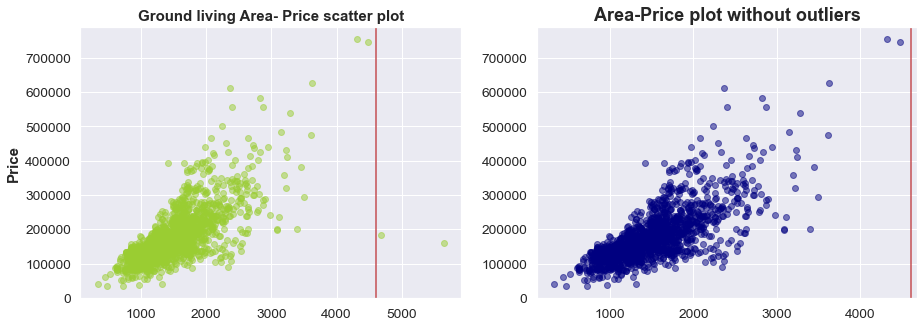

In [80]:
fig = plt.figure(figsize=(15,5))

cols = 2
rows = 1


ax1 = plt.subplot2grid((rows ,cols),(0,0))
plt.scatter(x=traindata['GrLivArea'], y=traindata['SalePrice'], color=('yellowgreen'), alpha=0.5)
plt.axvline(x=4600, color='r', linestyle='-')
plt.title('Ground living Area- Price scatter plot', fontsize=15, weight='bold' )
plt.ylabel('Price', fontsize=15, weight='bold' )
plt.grid(b=True)

ax1 = plt.subplot2grid((rows,cols),(0,1))
plt.scatter(x=train['GrLivArea'], y=target['SalePrice'], color='navy', alpha=0.5)
plt.axvline(x=4600, color='r', linestyle='-')
plt.title('Area-Price plot without outliers',weight='bold', fontsize=18)
plt.grid(b=True)

plt.show()

## Skewness and Kurtosis

As we explored with the SalePrice values earlier, we want our skewness value to be around 0 and kurtosis less than 3. For more information about skewness and kurtosis, I recommend reading this article.

https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa

skewness = degree of distortion, symmetrical data

kurtosis = measures the degree of outliers present in the distribution

Here are two examples of skewed features: Ground living area and 1st floor SF. We will apply np.log1p to the skewed variables.

In [81]:
print("Skewness before log transform: ", traindata['GrLivArea'].skew())
print("Kurtosis before log transform: ", traindata['GrLivArea'].kurt())

Skewness before log transform:  1.3665603560164552
Kurtosis before log transform:  4.895120580693174


In [82]:
print("Skewness after log transform: ", train['GrLivArea'].skew())
print("Kurtosis after log transform: ", train['GrLivArea'].kurt())

Skewness after log transform:  1.0127645385480262
Kurtosis after log transform:  2.0672339304153655


## Plotting distributions to show difference in skew and kurt by removing outliers

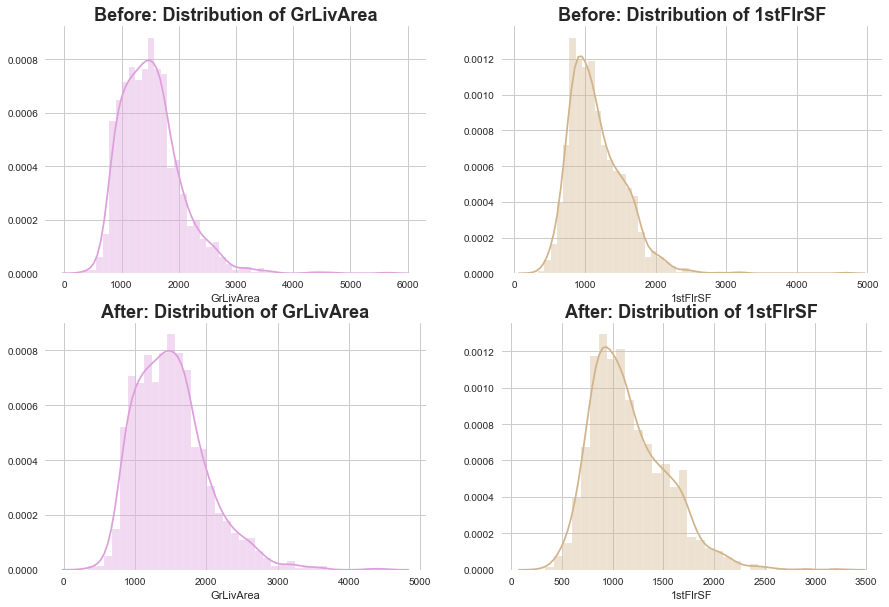

In [83]:
# Seaborn DISTPLOT This function combines the matplotlib hist function (with automatic calculation of a good default bin size) with the seaborn kdeplot() and rugplot() functions.
# Automatically caLculates good binsize to use
# rugplot Plot datapoints in an array as sticks on an axis.
# A Rug Plot is simply a projection of raw data points onto a particular axis

plt.style.use('seaborn')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,10))

cols = 2
rows = 2

ax1 = plt.subplot2grid((rows, cols),(0,0))
sns.distplot(traindata.GrLivArea, color='plum')
plt.title('Before: Distribution of GrLivArea',weight='bold', fontsize=18)

ax1 = plt.subplot2grid((rows,cols),(0,1))
sns.distplot(traindata['1stFlrSF'], color='tan')
plt.title('Before: Distribution of 1stFlrSF',weight='bold', fontsize=18)


ax1 = plt.subplot2grid((rows,cols),(1,0))
sns.distplot(train.GrLivArea, color='plum')
plt.title('After: Distribution of GrLivArea',weight='bold', fontsize=18)
#first row sec col
ax1 = plt.subplot2grid((rows,cols),(1,1))
sns.distplot(train['1stFlrSF'], color='tan')
plt.title('After: Distribution of 1stFlrSF',weight='bold', fontsize=18)
plt.show()

Last thing to do before Machine Learning is to log transform the target as well, as we did with the skewed features.

P.S. Log transform is only applied on the target in this version, not on the features. I will be applying the log transform on the features in future versions of this kernel

In [84]:
print("Skewness before log transform: ", target['SalePrice'].skew())
print("Kurtosis before log transform: ",target['SalePrice'].kurt())

Skewness before log transform:  1.8829247000823222
Kurtosis before log transform:  6.527120338179705


In [85]:
target["SalePrice"]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1457, dtype: int64

# Normalisation of data

According to [Hair et al. (2013)](https://www.amazon.com/Multivariate-Data-Analysis-Joseph-Hair/dp/9332536503/ref=as_sl_pc_tf_til?tag=pmarcelino-20&linkCode=w00&linkId=5e9109fa2213fef911dae80731a07a17&creativeASIN=9332536503), four assumptions should be tested:

* **Normality** - When we talk about normality what we mean is that the data should look like a normal distribution. 
    * This is important because several statistic tests rely on this (e.g. t-statistics). 
    * In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). 
    * Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. 
    * Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. 
    * However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.
    

* **Homoscedasticity** - Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

* **Linearity**- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

* **Absence of correlated errors** - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

**Why we use a log1p transformation**

https://www.kaggle.com/c/favorita-grocery-sales-forecasting/discussion/47124

## Normalising SalePrice

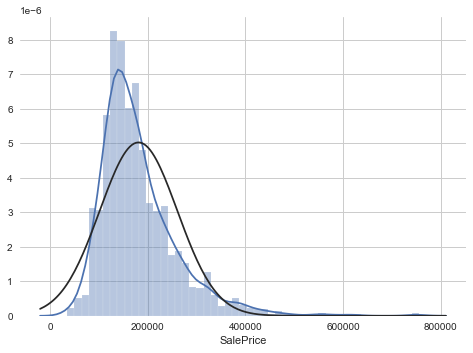

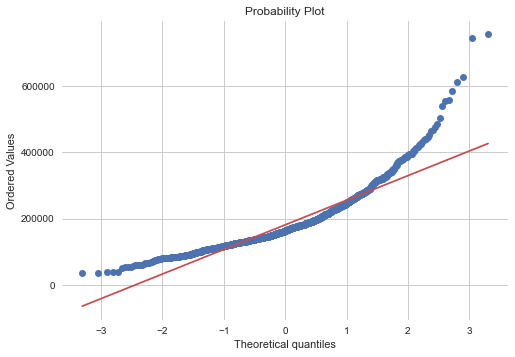

In [86]:
# histogram and normal probability plot
from scipy import stats

sns.distplot(traindata['SalePrice'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(traindata['SalePrice'], plot=plt)

* Ok, 'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.

* But everything's not lost. A simple data transformation can solve the problem. 
    * This is one of the awesome things you can learn in statistical books: in case of positive skewness, log transformations usually works well. 

In [87]:
# Log transform the target for normalisation
# To reduce skew and kurtosis

target["SalePrice"] = np.log1p(target["SalePrice"])

C:\Users\Alistair\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



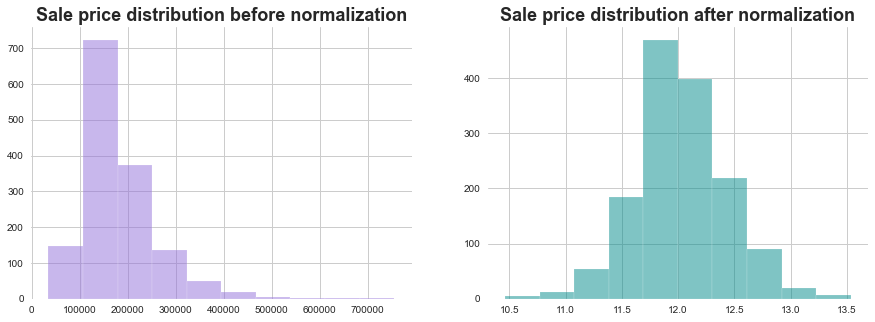

In [88]:
plt.style.use('seaborn')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,5))
#1 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((1,2),(0,0))
plt.hist(traindata.SalePrice, bins=10, color='mediumpurple',alpha=0.5)
plt.title('Sale price distribution before normalization',weight='bold', fontsize=18)
#first row sec col
ax1 = plt.subplot2grid((1,2),(0,1))
plt.hist(target.SalePrice, bins=10, color='darkcyan',alpha=0.5)
plt.title('Sale price distribution after normalization',weight='bold', fontsize=18)
plt.show()

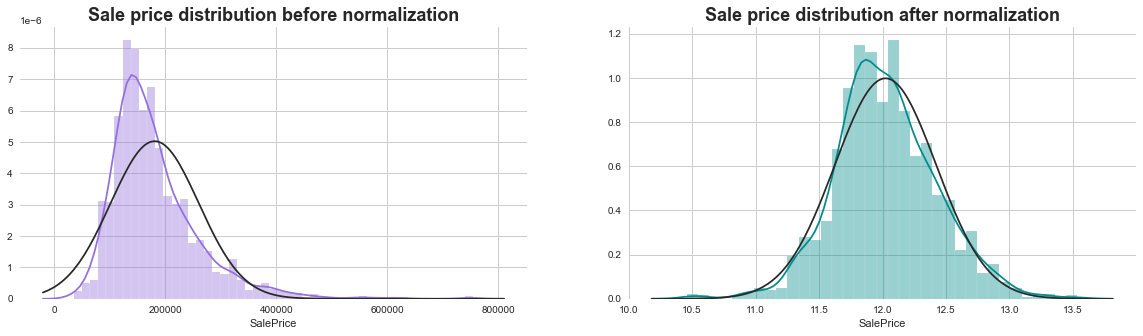

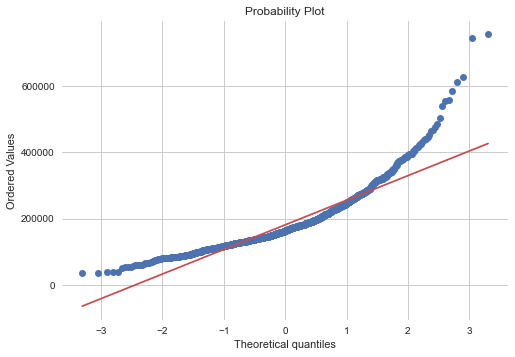

In [89]:
plt.style.use('seaborn')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(20,5))

rows = 1
cols = 2

ax1 = plt.subplot2grid((rows,cols),(0,0))
sns.distplot(traindata.SalePrice, color='mediumpurple', fit=stats.norm)
plt.title('Sale price distribution before normalization',weight='bold', fontsize=18)

ax1 = plt.subplot2grid((rows,cols),(0,1))
sns.distplot(target.SalePrice, color='darkcyan', fit=stats.norm)
plt.title('Sale price distribution after normalization', weight='bold', fontsize=18)
plt.show()

res = stats.probplot(traindata['SalePrice'], plot=plt)


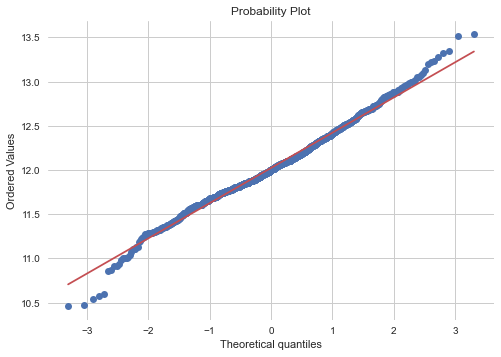

In [90]:
res = stats.probplot(target['SalePrice'], plot=plt)

In [91]:
print("Skewness after log transform: ", target['SalePrice'].skew())
print("Kurtosis after log transform: ",target['SalePrice'].kurt())

Skewness after log transform:  0.12299462625722304
Kurtosis after log transform:  0.8062416349541666


The skewness and kurtosis values look fine after log transform. We can now move forward to Machine Learning.

P.S. To get our original SalePrice values back, we will apply np.expm1 at the end of the study to cancel the log1p transformation after training and testing the models.

# Machine Learning

## Preprocessing

We start machine learning by setting the features and target:

* Features: x
* Target: y

In [92]:
x=train
y=np.array(target)

In [93]:
# Then, we split them to train and test sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = .3, random_state=0)

# Feature scaling

* Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

**Why do we need scaling?**

* Machine learning algorithm just sees number — if there is a vast difference in the range say few ranging in thousands and few ranging in the tens, and it makes the underlying assumption that higher ranging numbers have superiority of some sort. So these more significant number starts playing a more decisive role while training the model.
* Feature scaling is essential for machine learning algorithms that **calculate distances between data**. 
* If not scaled, the feature with a higher value range starts dominating when calculating distances
* The most common techniques of feature scaling are Normalization and Standardization.
* Uses standardisation to transform data - removes mean value andscale it by the standard deviation.
* After standardising data, the mean will be 0 and the standard deviation will be 1.
* We can speed up gradient descent by scaling because θ descends quickly on small ranges and slowly on large ranges, and oscillates inefficiently down to the optimum when the variables are very uneven.

<img src = https://miro.medium.com/max/1400/1*_783tuRRVcTUwyFWB8VG0g.png width=500>

<img src = https://miro.medium.com/max/1200/1*yi0VULDJmBfb1NaEikEciA.png width=500>

Check feature scaling here:

https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35

Types of scalers:
1. MinMaxScaler - sensitive to outliers
2. StandardScaler - need normally distributed data
3. MaxAbsScaler - only works on positive data and suffers from outliers
4. RobustScaler - robust to outliers
5. QuantileTransformerScaler
6. PowerTransformerScaler
7. UnitVectorScaler


We use RobustScaler to scale our data because it's powerful against outliers, we already detected some but there must be some other outliers out there, I will try to find them in future versions of the kernel

Robust scaler - It removes the median and scales the data according to the quantile range

More information on RobustScaler here:

https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9

In [94]:
# Robust scaler

from sklearn.preprocessing import RobustScaler
scaler= RobustScaler()

# transform "x_train"
x_train = scaler.fit_transform(x_train)

# transform "x_test"
x_test = scaler.transform(x_test)
                          
#Transform the test set
X_test = scaler.transform(Test)

## Linear regression

## Cross validation score

We first start by trying the very basic regression model: Linear regression.

* Cross-validation is a statistical method used to estimate the skill of machine learning models.
* It is commonly used in applied machine learning to compare and select a model for a given predictive modeling problem because it is easy to understand, easy to implement, and results in skill estimates that generally have a lower bias than other methods.
* k-fold cross validation is a procedure used to estimate the skill of the model on new data.

### How does it work?

* Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.
* The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. 
* As such, the procedure is often called k-fold cross-validation.
* When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.
* Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on **unseen data**.
* The k value must be chosen carefully for your data sample.
    * A value of k=10 is very common in the field of applied machine learning, and is recommend if you are struggling to choose a value for your dataset.

### General procedure
1. Shuffle the dataset randomly.
2. Split the dataset into k groups
3. For each unique group:
    1. Take the group as a hold out or test data set
    2. Take the remaining groups as a training data set
    3. Fit a model on the training set and evaluate it on the test set
    4. Retain the evaluation score and discard the model
4. Summarize the skill of the model using the sample of model evaluation scores

Here, we use 5- Fold cross validation for a better error estimate

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import math

model = LinearRegression()
MSEs = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=10)
meanMSE=np.mean(MSEs)
print(meanMSE)
print('RMSE = '+str(math.sqrt(-meanMSE)))

-21999557.21354531
RMSE = 4690.36855839126


Our goal is to minimize the error, we use regularization methods: Ridge, Lasso and ElasticNet, in order to lower the squared error

In [96]:
model.fit(x_train, y_train) # fits the data to find a best fit line for linear regression
acc = model.score(x_test, y_test)
acc

# this is a pretty bad score, our errors are too high!

-99636177437.03838

RMSE on Training set : 312186.3585547976
RMSE on Test set : 352674.77165924455


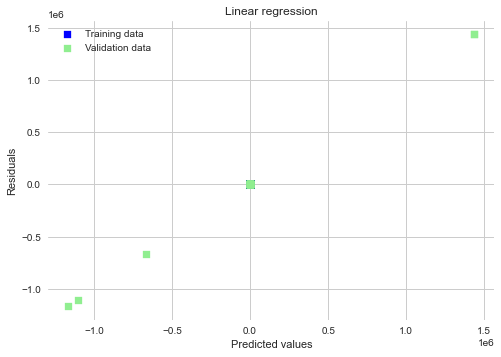

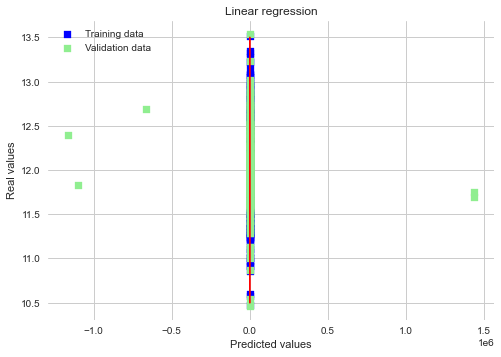

In [97]:
from sklearn.metrics import mean_squared_error, make_scorer

# Define error measure for official scoring : RMSE

scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, x_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, x_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

# Linear Regression
lr = LinearRegression()
lr.fit(x_train, y_train)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

## Regularization

* One of the major aspects of training your machine learning model is avoiding overfitting.
* The model will have a low accuracy if it is overfitting.
* This happens because your model is trying too hard to capture the noise in your training dataset.
* By noise we mean the data points that don’t really represent the true properties of your data, but random chance.
* Learning such data points, makes your model more flexible, at the risk of overfitting.

One of the ways of avoiding overfitting is using **cross validation**, that helps in estimating the error over test set, and in deciding what parameters work best for your model.#

Regularization in Machine Learning - Medium Article

https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a

https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b

* This equation below is a form of regression, that constrains/ regularizes or shrinks the coefficient estimates towards zero. 
* In other words, this technique discourages learning a more complex or flexible model, so as to avoid the risk of overfitting.
* The fitting procedure involves a loss function, known as residual sum of squares or RSS. The coefficients are chosen, such that they minimize this loss function.

<img src = https://miro.medium.com/max/908/1*DY3-IaGcHjjLg7oYXx1O3A.png>

### Ridge regression:
* Minimize squared error + a term (alpha) that penalizes the error
* We need to find a value of alpha that minimizes the train and test error (avoid overfitting)
* Below image shows ridge regression, where the RSS is modified by adding the shrinkage quantity
* Here, λ is the tuning parameter that decides how much we want to penalize the flexibility of our model.
* This λ additional term is called the Ridge Regression Penalty. This increases the bias of the model, making the fit worse on the training data, but also decreases the variance.


<img src = https://miro.medium.com/max/1106/1*CiqZ8lhwxi5c4d1nV24w4g.png>

### GridSearchCV 

* Grid search is the process of performing hyper parameter tuning in order to determine the optimal values for a given model.
* This is significant as the performance of the entire model is based on the hyper parameter values specified.
* There are libraries that have been implemented, such as GridSearchCV of the sklearn library, in order to automate tuning of the hyperparameters and make life a little bit easier for ML enthusiasts.

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge = Ridge()
parameters = {'alpha':[x for x in np.arange(1,101, 0.5)]} # Finding the best parameter which is lamda for ridge regression

ridge_reg = GridSearchCV(ridge, param_grid=parameters, scoring='neg_mean_squared_error', cv=10)
ridge_reg.fit(x_train,y_train)

print("The best value of Alpha is: ",ridge_reg.best_params_)
print("The best score achieved with Alpha %s is %s : " % (ridge_reg.best_params_,math.sqrt(-ridge_reg.best_score_)))
ridge_pred=math.sqrt(-ridge_reg.best_score_)

The best value of Alpha is:  {'alpha': 16.0}
The best score achieved with Alpha {'alpha': 16.0} is 0.11423753124992143 : 


In [99]:
from sklearn.metrics import mean_squared_error

ridge_mod = Ridge(alpha=21)
ridge_mod.fit(x_train,y_train)
y_pred_train=ridge_mod.predict(x_train)
y_pred_test=ridge_mod.predict(x_test)

print('Root Mean Square Error train = ' + str(math.sqrt(mean_squared_error(y_train, y_pred_train))))
print('Root Mean Square Error test = ' + str(math.sqrt(mean_squared_error(y_test, y_pred_test))))   

Root Mean Square Error train = 0.09525689411505144
Root Mean Square Error test = 0.11458998420338305


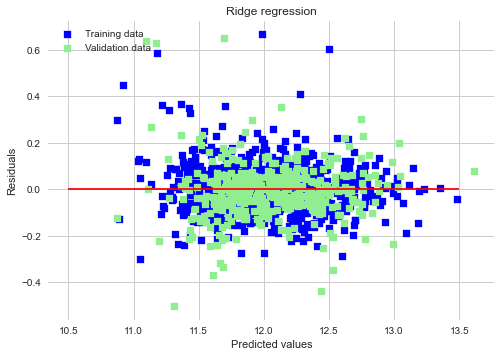

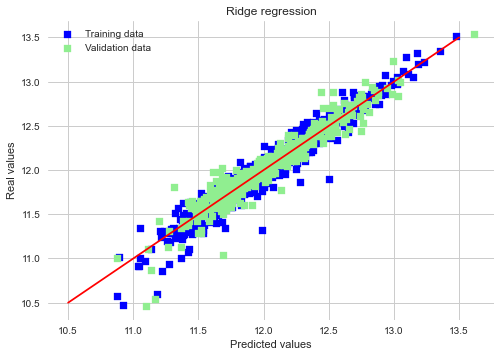

In [100]:
# Plotting ridge regression 

ridge_mod = Ridge(alpha=21)
ridge_mod.fit(x_train,y_train)

y_train_pred = ridge_mod.predict(x_train)
y_test_pred = ridge_mod.predict(x_test)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Ridge regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Ridge regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

* We check next, the important features that our model used to make predictions
* The number of uninformative features that were dropped. Lasso give a 0 coefficient to the useless features, we will use the coefficient given to the important feature to plot the graph

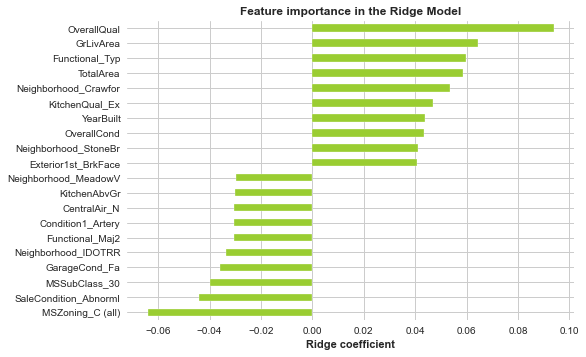

In [101]:
ridge_reshaped = np.reshape(ridge_mod.coef_, (-1))

coefs = pd.Series(ridge_reshaped, index = x.columns)

imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh", color='yellowgreen')
plt.xlabel("Ridge coefficient", weight='bold')
plt.title("Feature importance in the Ridge Model", weight='bold')
plt.show()

In [102]:
print("Ridge kept ",sum(coefs != 0), "important features and dropped the other ", sum(coefs == 0)," features")

Ridge kept  295 important features and dropped the other  6  features



### Next we try Lasso regularization: 

* This model may be very sensitive to outliers. So we need to made it more robust on them. For that we used the sklearn's Robustscaler() method on pipeline
* Similar procedure as ridge regularization but Lasso tends to have a lot of 0 entries in it and just few nonzeros (easy selection). In other words, lasso drops the uninformative features and keeps just the important ones.
* As with Ridge regularization, we need to find the alpha parameter that penalizes the error

<img src = https://miro.medium.com/max/1094/1*tHJ4sSPYV0bDr8xxEdiwXA.png>

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

lasso = Lasso()
parameters= {'alpha':[x for x in np.arange(0.01,101, 1)]}

lasso_reg = GridSearchCV(lasso, param_grid=parameters, scoring='neg_mean_squared_error', cv=10)
lasso_reg.fit(x_train,y_train)

print('The best value of Alpha is: ',lasso_reg.best_params_)
print("The best score achieved with Alpha %s is %s : " % (lasso_reg.best_params_,math.sqrt(-lasso_reg.best_score_)))
lasso_pred=math.sqrt(-lasso_reg.best_score_)

The best value of Alpha is:  {'alpha': 0.01}
The best score achieved with Alpha {'alpha': 0.01} is 0.13390508003287013 : 


In [104]:
from sklearn.metrics import mean_squared_error
 
lasso_mod = Lasso(alpha=0.01)
lasso_mod.fit(x_train,y_train)
y_lasso_train = lasso_mod.predict(x_train)
y_lasso_test = lasso_mod.predict(x_test)

print('Root Mean Square Error train = ' + str(math.sqrt(mean_squared_error(y_train, y_lasso_train))))
print('Root Mean Square Error test = ' + str(math.sqrt(mean_squared_error(y_test, y_lasso_test))))

Root Mean Square Error train = 0.12845235032902708
Root Mean Square Error test = 0.12990214492686178


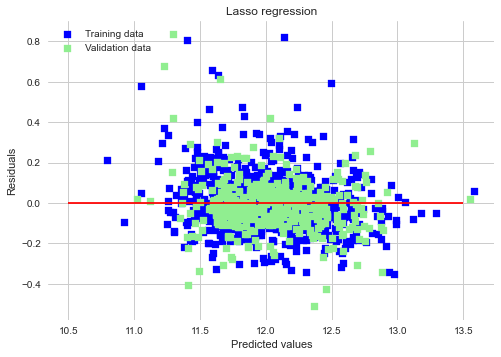

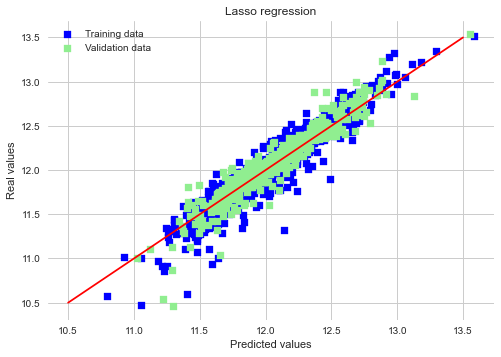

In [105]:
# Plotting ridge regression 

lasso_mod = Lasso(alpha=0.01)
lasso_mod.fit(x_train, y_train)

y_train_pred = lasso_mod.predict(x_train)
y_test_pred = lasso_mod.predict(x_test)

y_train_pred = np.reshape(y_train_pred, (1019,1)) # have to reshape
y_test_pred = np.reshape(y_test_pred, (438,1)) 

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Lasso regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Lasso regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()


* We check next, the important features that our model used to make predictions
* The number of uninformative features that were dropped. Lasso give a 0 coefficient to the useless features, we will use the coefficient given to the important feature to plot the graph

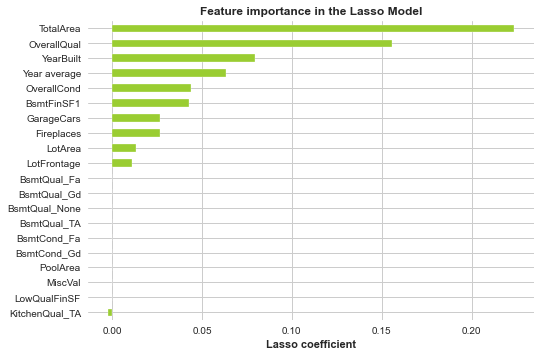

In [106]:
lasso_reshaped = np.reshape(lasso_mod.coef_, (-1))

coefs = pd.Series(lasso_reshaped, index = x.columns)

imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh", color='yellowgreen')
plt.xlabel("Lasso coefficient", weight='bold')
plt.title("Feature importance in the Lasso Model", weight='bold')
plt.show()

In [107]:
print("Lasso kept ",sum(coefs != 0), "important features and dropped the other ", sum(coefs == 0)," features")

Lasso kept  24 important features and dropped the other  277  features


* Next, we try ElasticNet. A regressor that combines both ridge and Lasso. We use cross validation to find:
    * Alpha
    * Ratio between Ridge and Lasso, for a better combination of both

### ElasticNet (L1 and L2 penalty) regularisation

ElasticNet is a compromise between Ridge and Lasso regression. It has a L1 penalty to generate sparsity and a L2 penalty to overcome some of the limitations of Lasso, such as the number of variables (Lasso can't select more features than it has observations, but it's not the case here anyway).

In [108]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error


alphas = [10,1,0.1,0.01,0.001,0.002,0.003,0.004,0.005,0.00054255]
l1ratio = [0.1, 0.3,0.5, 0.9, 0.95, 0.99, 1]

elastic_cv = ElasticNetCV(cv=10, max_iter=50000, alphas=alphas,  l1_ratio=l1ratio)

elasticmod = elastic_cv.fit(x_train, y_train.ravel())

print('The best value of Alpha is: ', elasticmod.alpha_)
print('The best value of l1_ratio is: ', elasticmod.l1_ratio_)

ela_pred_train = elasticmod.predict(x_train)
ela_pred_test = elasticmod.predict(x_test)

print('Root Mean Square Error on train set = ' + str(math.sqrt(mean_squared_error(y_train, ela_pred_train))))
print('Root Mean Square Error on test set = ' + str(math.sqrt(mean_squared_error(y_test, ela_pred_test))))

The best value of Alpha is:  0.00054255
The best value of l1_ratio is:  0.9
Root Mean Square Error on train set = 0.0946441557646207
Root Mean Square Error on test set = 0.1121763413168962


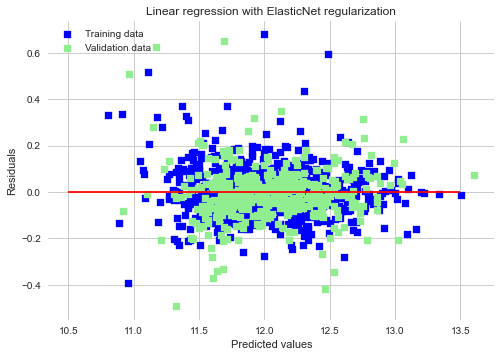

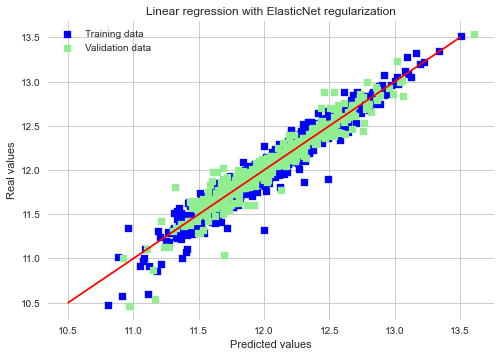

In [109]:
# Plotting ElasticNet regression 

# lasso_mod = Ridge()
# lasso_mod.fit(x_train, y_train)

elasticmod = elastic_cv.fit(x_train, y_train.ravel())

y_train_pred = elasticmod.predict(x_train)
y_test_pred = elasticmod.predict(x_test)

y_train_pred = np.reshape(y_train_pred, (1019,1)) # have to reshape as the ravel function messed up the shape, need it for plotting the graphs below
y_test_pred = np.reshape(y_test_pred, (438,1)) 


# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

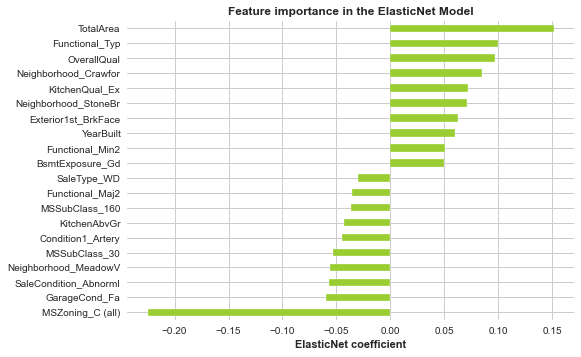

In [110]:
coefs = pd.Series(elasticmod.coef_, index = x.columns)

imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh", color='yellowgreen')
plt.xlabel("ElasticNet coefficient", weight='bold')
plt.title("Feature importance in the ElasticNet Model", weight='bold')
plt.show()

* Nice! The most important feature is the new feature we created "TotalArea".
* Other features such as neighborhood or overall quality are among the main important features.

In [111]:
print("ElasticNet kept ",sum(coefs != 0), "important features and dropped the other ", sum(coefs == 0)," features")

ElasticNet kept  115 important features and dropped the other  186  features


# Final prediction (ElasticNet)

In [112]:
# Using ElasticNet to submit as a first attempt
# Remember that X_test was scaled transformed earlier

elasticmod = elastic_cv.fit(x_train, y_train.ravel())
y_test_pred = elasticmod.predict(X_test)
y_real = np.expm1(y_test_pred)
y_real

array([118227.94015431, 152487.02055275, 179493.90194528, ...,
       170868.64576074, 116946.5915055 , 226109.48345648])

# Submission to Kaggle competition on 

In [113]:
final_submission = pd.DataFrame({
        "Id": testdata["Id"],
        "SalePrice": y_real
    })

In [114]:
final_submission.to_csv("final_submission.csv", index=False)
final_submission.head()

Id      SalePrice
0  1461  118227.940154
1  1462  152487.020553
2  1463  179493.901945
3  1464  198436.827178
4  1465  190320.736352

# Ensemble Methods

## Voting Regressor:

* A voting regressor is an ensemble meta-estimator that fits base regressors each on the whole dataset. It, then, averages the individual predictions to form a final prediction.
* After running the regressors, we combine them first with voting regressor in order to get a better model

In [115]:
from sklearn.ensemble import VotingRegressor

vote_mod = VotingRegressor([('Ridge', ridge_mod), ('Lasso', lasso_mod), ('Elastic', elastic_cv)])
vote = vote_mod.fit(x_train, y_train.ravel())
vote_pred = vote.predict(x_test)

print('Root Mean Square Error test = ' + str(math.sqrt(mean_squared_error(y_test, vote_pred))))

Root Mean Square Error test = 0.1140475638306471


# Section to complete

## Stacking models

## Adding a meta-model for stacking

## Boosting - to modify a weak learner to become better, which improves model's prediction and overall performance

### XGB Boost

* XGBoost is an algorithm that has recently been dominating applied machine learning and Kaggle competitions for structured or tabular data.
* XGBoost is an implementation of gradient boosted decision trees designed for speed and performance
* XGBoost stands for eXtreme Gradient Boosting.

This section is taken from https://www.kaggle.com/apapiu/regularized-linear-models


Check https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard notebook to complete



# (Extra optional work) Using neural networks to predict saleprices

In [116]:
from tensorflow import keras
# from tensorflow import keras
# from keras.layers import Dense
# from keras.models import Sequential
# from keras.regularizers import l1

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [117]:
X_train = StandardScaler().fit_transform(x_train)

In [118]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, random_state = 3)

In [119]:
model = keras.Sequential([
    keras.layers.Dense(200, input_dim=X_train.shape[1]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(25, activation="relu"),
    keras.layers.Dense(1, activation="linear")
    ])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               60400     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 26        
Total params: 86,851
Trainable params: 86,851
Non-trainable params: 0
_________________________________________________________________


In [120]:
model.compile(optimizer="adam", loss="mse") 

In [121]:
hist = model.fit(X_tr, y_tr, validation_data = (X_val, y_val), epochs=50)

Epoch 1/50
24/24 [==============================] - 0s 6ms/step - loss: 115.9658 - val_loss: 45.5295
Epoch 2/50
24/24 [==============================] - 0s 2ms/step - loss: 16.8918 - val_loss: 6.6710
Epoch 3/50
24/24 [==============================] - 0s 2ms/step - loss: 3.5145 - val_loss: 3.3647
Epoch 4/50
24/24 [==============================] - 0s 2ms/step - loss: 1.3753 - val_loss: 2.3363
Epoch 5/50
24/24 [==============================] - 0s 2ms/step - loss: 0.7133 - val_loss: 2.1459
Epoch 6/50
24/24 [==============================] - 0s 2ms/step - loss: 0.4559 - val_loss: 1.9570
Epoch 7/50
24/24 [==============================] - 0s 2ms/step - loss: 0.3072 - val_loss: 1.8140
Epoch 8/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2297 - val_loss: 1.8321
Epoch 9/50
24/24 [==============================] - 0s 2ms/step - loss: 0.1753 - val_loss: 1.7374
Epoch 10/50
24/24 [==============================] - 0s 2ms/step - loss: 0.1396 - val_loss: 1.7522
Epoch 11/50
24/

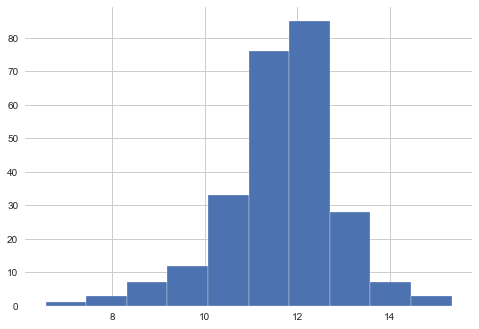

In [122]:
pd.Series(model.predict(X_val)[:,0]).hist()

## To be continued...